In [1]:
#Standard Header used on the projects

#first the major packages used for math and graphing
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler


#Custome graph format style sheet
plt.style.use('Prospectus.mplstyle')

#If being run by a seperate file, use the seperate file's graph format and saving paramaeters
#otherwise set what is needed
if not 'Saving' in locals():
    Saving = True
if not 'Titles' in locals():
    Titles = True
if not 'Ledgends' in locals():
    Ledgends = True
if not 'FFormat' in locals():
    FFormat = '.eps'
if not 'location' in locals():
    #save location.  First one is for running on home PC, second for running on the work laptop.  May need to make a global change
    location = 'E:\\Documents\\Dan\\Code\\FigsAndPlots\\FigsAndPlotsDocument\\Figures\\'
    #location = 'C:\\Users\\dhendrickson\\Documents\\github\\FigsAndPlots\\FigsAndPlotsDocument\\Figures\\'



In [2]:
# Task Specific includes:

#import scipy.special as sp
import math
import matplotlib.animation as animation
import time
from numpy import inf
# Choose which EFIT_Class to use:
# import EFIT_Class as EFIT
# import EFIT_Class_StressLargerVelocity as EFIT
import EFIT_Class_OrignalEqualGrid as EFIT
# import EFIT_Class_Parallel_EqualGrid as EFIT
# import EFIT_Class_VelocityLargerStress as EFIT
import visvis as vv

In [3]:
def makeAnimation(CenterZResults, title='Z'):
    y = np.linspace(0, BeamHeight, np.shape(CenterZResults[0][0])[1])
    x = np.linspace(0, BeamLength, np.shape(CenterZResults[0][0])[0])
    x,y = np.meshgrid(x,y)

    fig = plt.figure(figsize=(6.0,BeamHeight/BeamLength*6.0), dpi=100)
    ax = plt.axes(xlim=(0, BeamLength), ylim=(0, BeamHeight))  
    plt.ylabel(r'height')
    plt.xlabel(r'length')

    # animation function
    def animate(i): 
        z = np.matrix(CenterZResults[i][0][:,:]).T
        plt.title(str(i) + ' : ' + "{:.3e}".format(CenterZResults[i][1]))
        cont = plt.contourf(x, y, z, levels=5, cmap='gray') #,vmin=-100, vmax=100)
        #time.sleep(1)
        return cont  

    anim = animation.FuncAnimation(fig, animate, frames=np.shape(CenterZResults)[0])

    anim.save('animation'+title+'.gif')

In [4]:
# set Constants:
PoissonRatio = 0.3
YoungModulus = 20 * (10**9)
mu = 80 * (10**9)         #First Lame Parameter
lmbda = 2 * mu * PoissonRatio / (1 - 2 * PoissonRatio)     #second Lame Parameter
rho = 7800       #density kg/m^3

#Calculate speed of longitudinal and transverse waves
cl = np.sqrt((lmbda + 2* mu)/rho)
ct = np.sqrt(mu/rho)

#Choose ferquency to be used for excitment
frequency = 40000

#calculate wave length
omegal = cl / frequency
omegat = ct / frequency

#check max step size
dtmax = 1/ (max(cl,ct) * np.sqrt(3/(min(omegal,omegat)/10)))


# about 1foot (0.3m) of just the web of 175lbs rail 
# BeamLength = 0.3
# BeamHeight = 0.0762
# BeamWidth = 0.0381
BeamLength = 0.02
BeamHeight = 0.005
BeamWidth = 0.02

#Run for 6 Cycles:
runtime = 1.0 / frequency 

#Set time step and grid step to be 10 steps per frequency and ten steps per wavelength respectively
ts = 1 / frequency / 200  #  5e-08  #time step
gs = min(omegal, omegat) / 400    #grid step

Tsteps = int(math.ceil(runtime / ts)) + 1       #total Time STeps

gl = int(math.ceil(BeamLength / gs))         #number of grid points
gh = int(math.ceil(BeamHeight / gs)) 
gw = int(math.ceil(BeamWidth / gs)) 

print(dtmax,ts)

8.622367091851726e-06 1.25e-07


In [5]:
#Initialize EFIT Model
Rail = EFIT.EFIT(gl, gw, gh, ts, gs)

#Set Material Properties consitant througout
Rail.Gp[0,:,:,:] = rho  #constant Density
Rail.Gp[1,:,:,:] = lmbda #Constant first Lamee parameter 
Rail.Gp[2,:,:,:] = mu  #constant second Lamee parameter


In [6]:
# Inputs for forcing Function
Power = 10          #not sure on unit yet, just something for now
EmitterSize = 0.01  # meters, so 1 CM
Dimmension = 2      # 2 is in the z axis 
Direction = 1       # 1 is on top going down
CornerCut = 3       # how much of the corner is taken off of the square emitter
StartStep = 2
EndStep = 4

10 of 201 time steps. time is: 1.250e-06 on loop 0
20 of 201 time steps. time is: 2.500e-06 on loop 0
30 of 201 time steps. time is: 3.750e-06 on loop 0
40 of 201 time steps. time is: 5.000e-06 on loop 0
50 of 201 time steps. time is: 6.250e-06 on loop 0
60 of 201 time steps. time is: 7.500e-06 on loop 0
70 of 201 time steps. time is: 8.750e-06 on loop 0
80 of 201 time steps. time is: 1.000e-05 on loop 0
90 of 201 time steps. time is: 1.125e-05 on loop 0
100 of 201 time steps. time is: 1.250e-05 on loop 0
110 of 201 time steps. time is: 1.375e-05 on loop 0
120 of 201 time steps. time is: 1.500e-05 on loop 0
130 of 201 time steps. time is: 1.625e-05 on loop 0
140 of 201 time steps. time is: 1.750e-05 on loop 0
150 of 201 time steps. time is: 1.875e-05 on loop 0
160 of 201 time steps. time is: 2.000e-05 on loop 0
170 of 201 time steps. time is: 2.125e-05 on loop 0
180 of 201 time steps. time is: 2.250e-05 on loop 0
190 of 201 time steps. time is: 2.375e-05 on loop 0
200 of 201 time steps

C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 1
20 of 201 time steps. time is: 2.500e-06 on loop 1
30 of 201 time steps. time is: 3.750e-06 on loop 1
40 of 201 time steps. time is: 5.000e-06 on loop 1
50 of 201 time steps. time is: 6.250e-06 on loop 1
60 of 201 time steps. time is: 7.500e-06 on loop 1
70 of 201 time steps. time is: 8.750e-06 on loop 1
80 of 201 time steps. time is: 1.000e-05 on loop 1
90 of 201 time steps. time is: 1.125e-05 on loop 1
100 of 201 time steps. time is: 1.250e-05 on loop 1
110 of 201 time steps. time is: 1.375e-05 on loop 1
120 of 201 time steps. time is: 1.500e-05 on loop 1
130 of 201 time steps. time is: 1.625e-05 on loop 1
140 of 201 time steps. time is: 1.750e-05 on loop 1
150 of 201 time steps. time is: 1.875e-05 on loop 1
160 of 201 time steps. time is: 2.000e-05 on loop 1
170 of 201 time steps. time is: 2.125e-05 on loop 1
180 of 201 time steps. time is: 2.250e-05 on loop 1
190 of 201 time steps. time is: 2.375e-05 on loop 1
200 of 201 time steps

C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 2
20 of 201 time steps. time is: 2.500e-06 on loop 2
30 of 201 time steps. time is: 3.750e-06 on loop 2
40 of 201 time steps. time is: 5.000e-06 on loop 2
50 of 201 time steps. time is: 6.250e-06 on loop 2
60 of 201 time steps. time is: 7.500e-06 on loop 2
70 of 201 time steps. time is: 8.750e-06 on loop 2
80 of 201 time steps. time is: 1.000e-05 on loop 2
90 of 201 time steps. time is: 1.125e-05 on loop 2
100 of 201 time steps. time is: 1.250e-05 on loop 2
110 of 201 time steps. time is: 1.375e-05 on loop 2
120 of 201 time steps. time is: 1.500e-05 on loop 2
130 of 201 time steps. time is: 1.625e-05 on loop 2
140 of 201 time steps. time is: 1.750e-05 on loop 2
150 of 201 time steps. time is: 1.875e-05 on loop 2
160 of 201 time steps. time is: 2.000e-05 on loop 2
170 of 201 time steps. time is: 2.125e-05 on loop 2
180 of 201 time steps. time is: 2.250e-05 on loop 2
190 of 201 time steps. time is: 2.375e-05 on loop 2
200 of 201 time steps

C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 3
20 of 201 time steps. time is: 2.500e-06 on loop 3
30 of 201 time steps. time is: 3.750e-06 on loop 3
40 of 201 time steps. time is: 5.000e-06 on loop 3
50 of 201 time steps. time is: 6.250e-06 on loop 3
60 of 201 time steps. time is: 7.500e-06 on loop 3
70 of 201 time steps. time is: 8.750e-06 on loop 3
80 of 201 time steps. time is: 1.000e-05 on loop 3
90 of 201 time steps. time is: 1.125e-05 on loop 3
100 of 201 time steps. time is: 1.250e-05 on loop 3
110 of 201 time steps. time is: 1.375e-05 on loop 3
120 of 201 time steps. time is: 1.500e-05 on loop 3
130 of 201 time steps. time is: 1.625e-05 on loop 3
140 of 201 time steps. time is: 1.750e-05 on loop 3
150 of 201 time steps. time is: 1.875e-05 on loop 3
160 of 201 time steps. time is: 2.000e-05 on loop 3
170 of 201 time steps. time is: 2.125e-05 on loop 3
180 of 201 time steps. time is: 2.250e-05 on loop 3
190 of 201 time steps. time is: 2.375e-05 on loop 3
200 of 201 time steps

C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 4
20 of 201 time steps. time is: 2.500e-06 on loop 4
30 of 201 time steps. time is: 3.750e-06 on loop 4
40 of 201 time steps. time is: 5.000e-06 on loop 4
50 of 201 time steps. time is: 6.250e-06 on loop 4
60 of 201 time steps. time is: 7.500e-06 on loop 4
70 of 201 time steps. time is: 8.750e-06 on loop 4
80 of 201 time steps. time is: 1.000e-05 on loop 4
90 of 201 time steps. time is: 1.125e-05 on loop 4
100 of 201 time steps. time is: 1.250e-05 on loop 4
110 of 201 time steps. time is: 1.375e-05 on loop 4
120 of 201 time steps. time is: 1.500e-05 on loop 4
130 of 201 time steps. time is: 1.625e-05 on loop 4
140 of 201 time steps. time is: 1.750e-05 on loop 4
150 of 201 time steps. time is: 1.875e-05 on loop 4
160 of 201 time steps. time is: 2.000e-05 on loop 4
170 of 201 time steps. time is: 2.125e-05 on loop 4
180 of 201 time steps. time is: 2.250e-05 on loop 4
190 of 201 time steps. time is: 2.375e-05 on loop 4
200 of 201 time steps

C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 5
20 of 201 time steps. time is: 2.500e-06 on loop 5
30 of 201 time steps. time is: 3.750e-06 on loop 5
40 of 201 time steps. time is: 5.000e-06 on loop 5
50 of 201 time steps. time is: 6.250e-06 on loop 5
60 of 201 time steps. time is: 7.500e-06 on loop 5
70 of 201 time steps. time is: 8.750e-06 on loop 5
80 of 201 time steps. time is: 1.000e-05 on loop 5
90 of 201 time steps. time is: 1.125e-05 on loop 5
100 of 201 time steps. time is: 1.250e-05 on loop 5
110 of 201 time steps. time is: 1.375e-05 on loop 5
120 of 201 time steps. time is: 1.500e-05 on loop 5
130 of 201 time steps. time is: 1.625e-05 on loop 5
140 of 201 time steps. time is: 1.750e-05 on loop 5
150 of 201 time steps. time is: 1.875e-05 on loop 5
160 of 201 time steps. time is: 2.000e-05 on loop 5
170 of 201 time steps. time is: 2.125e-05 on loop 5
180 of 201 time steps. time is: 2.250e-05 on loop 5
190 of 201 time steps. time is: 2.375e-05 on loop 5
200 of 201 time steps

C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 6
20 of 201 time steps. time is: 2.500e-06 on loop 6
30 of 201 time steps. time is: 3.750e-06 on loop 6
40 of 201 time steps. time is: 5.000e-06 on loop 6
50 of 201 time steps. time is: 6.250e-06 on loop 6
60 of 201 time steps. time is: 7.500e-06 on loop 6
70 of 201 time steps. time is: 8.750e-06 on loop 6
80 of 201 time steps. time is: 1.000e-05 on loop 6
90 of 201 time steps. time is: 1.125e-05 on loop 6
100 of 201 time steps. time is: 1.250e-05 on loop 6
110 of 201 time steps. time is: 1.375e-05 on loop 6
120 of 201 time steps. time is: 1.500e-05 on loop 6
130 of 201 time steps. time is: 1.625e-05 on loop 6
140 of 201 time steps. time is: 1.750e-05 on loop 6
150 of 201 time steps. time is: 1.875e-05 on loop 6
160 of 201 time steps. time is: 2.000e-05 on loop 6
170 of 201 time steps. time is: 2.125e-05 on loop 6
180 of 201 time steps. time is: 2.250e-05 on loop 6
190 of 201 time steps. time is: 2.375e-05 on loop 6
200 of 201 time steps

C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 7
20 of 201 time steps. time is: 2.500e-06 on loop 7
30 of 201 time steps. time is: 3.750e-06 on loop 7
40 of 201 time steps. time is: 5.000e-06 on loop 7
50 of 201 time steps. time is: 6.250e-06 on loop 7
60 of 201 time steps. time is: 7.500e-06 on loop 7
70 of 201 time steps. time is: 8.750e-06 on loop 7
80 of 201 time steps. time is: 1.000e-05 on loop 7
90 of 201 time steps. time is: 1.125e-05 on loop 7
100 of 201 time steps. time is: 1.250e-05 on loop 7
110 of 201 time steps. time is: 1.375e-05 on loop 7
120 of 201 time steps. time is: 1.500e-05 on loop 7
130 of 201 time steps. time is: 1.625e-05 on loop 7
140 of 201 time steps. time is: 1.750e-05 on loop 7
150 of 201 time steps. time is: 1.875e-05 on loop 7
160 of 201 time steps. time is: 2.000e-05 on loop 7
170 of 201 time steps. time is: 2.125e-05 on loop 7
180 of 201 time steps. time is: 2.250e-05 on loop 7
190 of 201 time steps. time is: 2.375e-05 on loop 7
200 of 201 time steps

C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 8
20 of 201 time steps. time is: 2.500e-06 on loop 8
30 of 201 time steps. time is: 3.750e-06 on loop 8
40 of 201 time steps. time is: 5.000e-06 on loop 8
50 of 201 time steps. time is: 6.250e-06 on loop 8
60 of 201 time steps. time is: 7.500e-06 on loop 8
70 of 201 time steps. time is: 8.750e-06 on loop 8
80 of 201 time steps. time is: 1.000e-05 on loop 8
90 of 201 time steps. time is: 1.125e-05 on loop 8
100 of 201 time steps. time is: 1.250e-05 on loop 8
110 of 201 time steps. time is: 1.375e-05 on loop 8
120 of 201 time steps. time is: 1.500e-05 on loop 8
130 of 201 time steps. time is: 1.625e-05 on loop 8
140 of 201 time steps. time is: 1.750e-05 on loop 8


e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:117: RuntimeWarning: overflow encountered in double_scalars
  Ds[0,0] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:122: RuntimeWarning: overflow encountered in double_scalars
  Ds[1,1] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:127: RuntimeWarning: overflow encountered in double_scalars
  Ds[2,2] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:133: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:138: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:143: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:399: RuntimeWarning: invalid value encountered in double_scalars
  self.Gs[j,i,x,y,z] +

150 of 201 time steps. time is: 1.875e-05 on loop 8
160 of 201 time steps. time is: 2.000e-05 on loop 8
170 of 201 time steps. time is: 2.125e-05 on loop 8
180 of 201 time steps. time is: 2.250e-05 on loop 8
190 of 201 time steps. time is: 2.375e-05 on loop 8
200 of 201 time steps. time is: 2.500e-05 on loop 8


C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 9
20 of 201 time steps. time is: 2.500e-06 on loop 9
30 of 201 time steps. time is: 3.750e-06 on loop 9
40 of 201 time steps. time is: 5.000e-06 on loop 9
50 of 201 time steps. time is: 6.250e-06 on loop 9
60 of 201 time steps. time is: 7.500e-06 on loop 9
70 of 201 time steps. time is: 8.750e-06 on loop 9
80 of 201 time steps. time is: 1.000e-05 on loop 9
90 of 201 time steps. time is: 1.125e-05 on loop 9
100 of 201 time steps. time is: 1.250e-05 on loop 9
110 of 201 time steps. time is: 1.375e-05 on loop 9
120 of 201 time steps. time is: 1.500e-05 on loop 9
130 of 201 time steps. time is: 1.625e-05 on loop 9
140 of 201 time steps. time is: 1.750e-05 on loop 9


e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:117: RuntimeWarning: overflow encountered in double_scalars
  Ds[0,0] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:122: RuntimeWarning: overflow encountered in double_scalars
  Ds[1,1] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:127: RuntimeWarning: overflow encountered in double_scalars
  Ds[2,2] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:133: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:138: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:143: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:399: RuntimeWarning: invalid value encountered in double_scalars
  self.Gs[j,i,x,y,z] +

150 of 201 time steps. time is: 1.875e-05 on loop 9
160 of 201 time steps. time is: 2.000e-05 on loop 9
170 of 201 time steps. time is: 2.125e-05 on loop 9
180 of 201 time steps. time is: 2.250e-05 on loop 9
190 of 201 time steps. time is: 2.375e-05 on loop 9
200 of 201 time steps. time is: 2.500e-05 on loop 9


C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 10
20 of 201 time steps. time is: 2.500e-06 on loop 10
30 of 201 time steps. time is: 3.750e-06 on loop 10
40 of 201 time steps. time is: 5.000e-06 on loop 10
50 of 201 time steps. time is: 6.250e-06 on loop 10
60 of 201 time steps. time is: 7.500e-06 on loop 10
70 of 201 time steps. time is: 8.750e-06 on loop 10
80 of 201 time steps. time is: 1.000e-05 on loop 10
90 of 201 time steps. time is: 1.125e-05 on loop 10
100 of 201 time steps. time is: 1.250e-05 on loop 10
110 of 201 time steps. time is: 1.375e-05 on loop 10
120 of 201 time steps. time is: 1.500e-05 on loop 10
130 of 201 time steps. time is: 1.625e-05 on loop 10
140 of 201 time steps. time is: 1.750e-05 on loop 10


e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:117: RuntimeWarning: overflow encountered in double_scalars
  Ds[0,0] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:122: RuntimeWarning: overflow encountered in double_scalars
  Ds[1,1] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:127: RuntimeWarning: overflow encountered in double_scalars
  Ds[2,2] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:133: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:138: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:143: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:399: RuntimeWarning: invalid value encountered in double_scalars
  self.Gs[j,i,x,y,z] +

150 of 201 time steps. time is: 1.875e-05 on loop 10
160 of 201 time steps. time is: 2.000e-05 on loop 10
170 of 201 time steps. time is: 2.125e-05 on loop 10
180 of 201 time steps. time is: 2.250e-05 on loop 10
190 of 201 time steps. time is: 2.375e-05 on loop 10
200 of 201 time steps. time is: 2.500e-05 on loop 10


C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 11
20 of 201 time steps. time is: 2.500e-06 on loop 11
30 of 201 time steps. time is: 3.750e-06 on loop 11
40 of 201 time steps. time is: 5.000e-06 on loop 11
50 of 201 time steps. time is: 6.250e-06 on loop 11
60 of 201 time steps. time is: 7.500e-06 on loop 11
70 of 201 time steps. time is: 8.750e-06 on loop 11
80 of 201 time steps. time is: 1.000e-05 on loop 11
90 of 201 time steps. time is: 1.125e-05 on loop 11
100 of 201 time steps. time is: 1.250e-05 on loop 11
110 of 201 time steps. time is: 1.375e-05 on loop 11
120 of 201 time steps. time is: 1.500e-05 on loop 11
130 of 201 time steps. time is: 1.625e-05 on loop 11
140 of 201 time steps. time is: 1.750e-05 on loop 11


e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:117: RuntimeWarning: overflow encountered in double_scalars
  Ds[0,0] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:122: RuntimeWarning: overflow encountered in double_scalars
  Ds[1,1] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:127: RuntimeWarning: overflow encountered in double_scalars
  Ds[2,2] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:133: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:138: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:143: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:399: RuntimeWarning: invalid value encountered in double_scalars
  self.Gs[j,i,x,y,z] +

150 of 201 time steps. time is: 1.875e-05 on loop 11
160 of 201 time steps. time is: 2.000e-05 on loop 11
170 of 201 time steps. time is: 2.125e-05 on loop 11
180 of 201 time steps. time is: 2.250e-05 on loop 11
190 of 201 time steps. time is: 2.375e-05 on loop 11
200 of 201 time steps. time is: 2.500e-05 on loop 11


C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 12
20 of 201 time steps. time is: 2.500e-06 on loop 12
30 of 201 time steps. time is: 3.750e-06 on loop 12
40 of 201 time steps. time is: 5.000e-06 on loop 12
50 of 201 time steps. time is: 6.250e-06 on loop 12
60 of 201 time steps. time is: 7.500e-06 on loop 12
70 of 201 time steps. time is: 8.750e-06 on loop 12
80 of 201 time steps. time is: 1.000e-05 on loop 12
90 of 201 time steps. time is: 1.125e-05 on loop 12
100 of 201 time steps. time is: 1.250e-05 on loop 12
110 of 201 time steps. time is: 1.375e-05 on loop 12
120 of 201 time steps. time is: 1.500e-05 on loop 12
130 of 201 time steps. time is: 1.625e-05 on loop 12
140 of 201 time steps. time is: 1.750e-05 on loop 12


e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:117: RuntimeWarning: overflow encountered in double_scalars
  Ds[0,0] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:122: RuntimeWarning: overflow encountered in double_scalars
  Ds[1,1] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:127: RuntimeWarning: overflow encountered in double_scalars
  Ds[2,2] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:133: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:138: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:143: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:399: RuntimeWarning: invalid value encountered in double_scalars
  self.Gs[j,i,x,y,z] +

150 of 201 time steps. time is: 1.875e-05 on loop 12
160 of 201 time steps. time is: 2.000e-05 on loop 12
170 of 201 time steps. time is: 2.125e-05 on loop 12
180 of 201 time steps. time is: 2.250e-05 on loop 12
190 of 201 time steps. time is: 2.375e-05 on loop 12
200 of 201 time steps. time is: 2.500e-05 on loop 12


C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 13
20 of 201 time steps. time is: 2.500e-06 on loop 13
30 of 201 time steps. time is: 3.750e-06 on loop 13
40 of 201 time steps. time is: 5.000e-06 on loop 13
50 of 201 time steps. time is: 6.250e-06 on loop 13
60 of 201 time steps. time is: 7.500e-06 on loop 13
70 of 201 time steps. time is: 8.750e-06 on loop 13
80 of 201 time steps. time is: 1.000e-05 on loop 13
90 of 201 time steps. time is: 1.125e-05 on loop 13
100 of 201 time steps. time is: 1.250e-05 on loop 13
110 of 201 time steps. time is: 1.375e-05 on loop 13
120 of 201 time steps. time is: 1.500e-05 on loop 13
130 of 201 time steps. time is: 1.625e-05 on loop 13
140 of 201 time steps. time is: 1.750e-05 on loop 13


e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:117: RuntimeWarning: overflow encountered in double_scalars
  Ds[0,0] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:122: RuntimeWarning: overflow encountered in double_scalars
  Ds[1,1] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:127: RuntimeWarning: overflow encountered in double_scalars
  Ds[2,2] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:133: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:138: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:143: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:399: RuntimeWarning: invalid value encountered in double_scalars
  self.Gs[j,i,x,y,z] +

150 of 201 time steps. time is: 1.875e-05 on loop 13
160 of 201 time steps. time is: 2.000e-05 on loop 13
170 of 201 time steps. time is: 2.125e-05 on loop 13
180 of 201 time steps. time is: 2.250e-05 on loop 13
190 of 201 time steps. time is: 2.375e-05 on loop 13
200 of 201 time steps. time is: 2.500e-05 on loop 13


C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 14
20 of 201 time steps. time is: 2.500e-06 on loop 14
30 of 201 time steps. time is: 3.750e-06 on loop 14
40 of 201 time steps. time is: 5.000e-06 on loop 14
50 of 201 time steps. time is: 6.250e-06 on loop 14
60 of 201 time steps. time is: 7.500e-06 on loop 14
70 of 201 time steps. time is: 8.750e-06 on loop 14
80 of 201 time steps. time is: 1.000e-05 on loop 14
90 of 201 time steps. time is: 1.125e-05 on loop 14
100 of 201 time steps. time is: 1.250e-05 on loop 14
110 of 201 time steps. time is: 1.375e-05 on loop 14
120 of 201 time steps. time is: 1.500e-05 on loop 14
130 of 201 time steps. time is: 1.625e-05 on loop 14
140 of 201 time steps. time is: 1.750e-05 on loop 14


e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:117: RuntimeWarning: overflow encountered in double_scalars
  Ds[0,0] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:122: RuntimeWarning: overflow encountered in double_scalars
  Ds[1,1] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:127: RuntimeWarning: overflow encountered in double_scalars
  Ds[2,2] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:133: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:138: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:143: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:399: RuntimeWarning: invalid value encountered in double_scalars
  self.Gs[j,i,x,y,z] +

150 of 201 time steps. time is: 1.875e-05 on loop 14
160 of 201 time steps. time is: 2.000e-05 on loop 14
170 of 201 time steps. time is: 2.125e-05 on loop 14
180 of 201 time steps. time is: 2.250e-05 on loop 14
190 of 201 time steps. time is: 2.375e-05 on loop 14
200 of 201 time steps. time is: 2.500e-05 on loop 14


C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 15
20 of 201 time steps. time is: 2.500e-06 on loop 15
30 of 201 time steps. time is: 3.750e-06 on loop 15
40 of 201 time steps. time is: 5.000e-06 on loop 15
50 of 201 time steps. time is: 6.250e-06 on loop 15
60 of 201 time steps. time is: 7.500e-06 on loop 15
70 of 201 time steps. time is: 8.750e-06 on loop 15
80 of 201 time steps. time is: 1.000e-05 on loop 15
90 of 201 time steps. time is: 1.125e-05 on loop 15
100 of 201 time steps. time is: 1.250e-05 on loop 15
110 of 201 time steps. time is: 1.375e-05 on loop 15
120 of 201 time steps. time is: 1.500e-05 on loop 15
130 of 201 time steps. time is: 1.625e-05 on loop 15
140 of 201 time steps. time is: 1.750e-05 on loop 15


e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:117: RuntimeWarning: overflow encountered in double_scalars
  Ds[0,0] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:122: RuntimeWarning: overflow encountered in double_scalars
  Ds[1,1] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:127: RuntimeWarning: overflow encountered in double_scalars
  Ds[2,2] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:133: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:138: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:143: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:399: RuntimeWarning: invalid value encountered in double_scalars
  self.Gs[j,i,x,y,z] +

150 of 201 time steps. time is: 1.875e-05 on loop 15
160 of 201 time steps. time is: 2.000e-05 on loop 15
170 of 201 time steps. time is: 2.125e-05 on loop 15
180 of 201 time steps. time is: 2.250e-05 on loop 15
190 of 201 time steps. time is: 2.375e-05 on loop 15
200 of 201 time steps. time is: 2.500e-05 on loop 15


C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 16
20 of 201 time steps. time is: 2.500e-06 on loop 16
30 of 201 time steps. time is: 3.750e-06 on loop 16
40 of 201 time steps. time is: 5.000e-06 on loop 16
50 of 201 time steps. time is: 6.250e-06 on loop 16
60 of 201 time steps. time is: 7.500e-06 on loop 16
70 of 201 time steps. time is: 8.750e-06 on loop 16
80 of 201 time steps. time is: 1.000e-05 on loop 16
90 of 201 time steps. time is: 1.125e-05 on loop 16
100 of 201 time steps. time is: 1.250e-05 on loop 16
110 of 201 time steps. time is: 1.375e-05 on loop 16
120 of 201 time steps. time is: 1.500e-05 on loop 16
130 of 201 time steps. time is: 1.625e-05 on loop 16
140 of 201 time steps. time is: 1.750e-05 on loop 16
150 of 201 time steps. time is: 1.875e-05 on loop 16
160 of 201 time steps. time is: 2.000e-05 on loop 16
170 of 201 time steps. time is: 2.125e-05 on loop 16
180 of 201 time steps. time is: 2.250e-05 on loop 16
190 of 201 time steps. time is: 2.375e-05 on loop 16
20

C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 17
20 of 201 time steps. time is: 2.500e-06 on loop 17
30 of 201 time steps. time is: 3.750e-06 on loop 17
40 of 201 time steps. time is: 5.000e-06 on loop 17
50 of 201 time steps. time is: 6.250e-06 on loop 17
60 of 201 time steps. time is: 7.500e-06 on loop 17
70 of 201 time steps. time is: 8.750e-06 on loop 17
80 of 201 time steps. time is: 1.000e-05 on loop 17
90 of 201 time steps. time is: 1.125e-05 on loop 17
100 of 201 time steps. time is: 1.250e-05 on loop 17
110 of 201 time steps. time is: 1.375e-05 on loop 17
120 of 201 time steps. time is: 1.500e-05 on loop 17
130 of 201 time steps. time is: 1.625e-05 on loop 17
140 of 201 time steps. time is: 1.750e-05 on loop 17
150 of 201 time steps. time is: 1.875e-05 on loop 17
160 of 201 time steps. time is: 2.000e-05 on loop 17
170 of 201 time steps. time is: 2.125e-05 on loop 17
180 of 201 time steps. time is: 2.250e-05 on loop 17
190 of 201 time steps. time is: 2.375e-05 on loop 17
20

C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 18
20 of 201 time steps. time is: 2.500e-06 on loop 18
30 of 201 time steps. time is: 3.750e-06 on loop 18
40 of 201 time steps. time is: 5.000e-06 on loop 18
50 of 201 time steps. time is: 6.250e-06 on loop 18
60 of 201 time steps. time is: 7.500e-06 on loop 18
70 of 201 time steps. time is: 8.750e-06 on loop 18
80 of 201 time steps. time is: 1.000e-05 on loop 18
90 of 201 time steps. time is: 1.125e-05 on loop 18
100 of 201 time steps. time is: 1.250e-05 on loop 18
110 of 201 time steps. time is: 1.375e-05 on loop 18
120 of 201 time steps. time is: 1.500e-05 on loop 18
130 of 201 time steps. time is: 1.625e-05 on loop 18
140 of 201 time steps. time is: 1.750e-05 on loop 18
150 of 201 time steps. time is: 1.875e-05 on loop 18
160 of 201 time steps. time is: 2.000e-05 on loop 18
170 of 201 time steps. time is: 2.125e-05 on loop 18
180 of 201 time steps. time is: 2.250e-05 on loop 18
190 of 201 time steps. time is: 2.375e-05 on loop 18
20

C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 19
20 of 201 time steps. time is: 2.500e-06 on loop 19
30 of 201 time steps. time is: 3.750e-06 on loop 19
40 of 201 time steps. time is: 5.000e-06 on loop 19
50 of 201 time steps. time is: 6.250e-06 on loop 19
60 of 201 time steps. time is: 7.500e-06 on loop 19
70 of 201 time steps. time is: 8.750e-06 on loop 19
80 of 201 time steps. time is: 1.000e-05 on loop 19
90 of 201 time steps. time is: 1.125e-05 on loop 19
100 of 201 time steps. time is: 1.250e-05 on loop 19
110 of 201 time steps. time is: 1.375e-05 on loop 19
120 of 201 time steps. time is: 1.500e-05 on loop 19
130 of 201 time steps. time is: 1.625e-05 on loop 19
140 of 201 time steps. time is: 1.750e-05 on loop 19
150 of 201 time steps. time is: 1.875e-05 on loop 19
160 of 201 time steps. time is: 2.000e-05 on loop 19
170 of 201 time steps. time is: 2.125e-05 on loop 19
180 of 201 time steps. time is: 2.250e-05 on loop 19
190 of 201 time steps. time is: 2.375e-05 on loop 19
20

C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 20
20 of 201 time steps. time is: 2.500e-06 on loop 20
30 of 201 time steps. time is: 3.750e-06 on loop 20
40 of 201 time steps. time is: 5.000e-06 on loop 20
50 of 201 time steps. time is: 6.250e-06 on loop 20
60 of 201 time steps. time is: 7.500e-06 on loop 20
70 of 201 time steps. time is: 8.750e-06 on loop 20
80 of 201 time steps. time is: 1.000e-05 on loop 20
90 of 201 time steps. time is: 1.125e-05 on loop 20
100 of 201 time steps. time is: 1.250e-05 on loop 20
110 of 201 time steps. time is: 1.375e-05 on loop 20
120 of 201 time steps. time is: 1.500e-05 on loop 20
130 of 201 time steps. time is: 1.625e-05 on loop 20
140 of 201 time steps. time is: 1.750e-05 on loop 20
150 of 201 time steps. time is: 1.875e-05 on loop 20
160 of 201 time steps. time is: 2.000e-05 on loop 20
170 of 201 time steps. time is: 2.125e-05 on loop 20
180 of 201 time steps. time is: 2.250e-05 on loop 20
190 of 201 time steps. time is: 2.375e-05 on loop 20
20

C:\Users\Dan\AppData\Local\Temp/ipykernel_35416/1916218085.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(6.0,BeamHeight/BeamLength*6.0), dpi=100)
C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 21
20 of 201 time steps. time is: 2.500e-06 on loop 21
30 of 201 time steps. time is: 3.750e-06 on loop 21
40 of 201 time steps. time is: 5.000e-06 on loop 21
50 of 201 time steps. time is: 6.250e-06 on loop 21
60 of 201 time steps. time is: 7.500e-06 on loop 21
70 of 201 time steps. time is: 8.750e-06 on loop 21
80 of 201 time steps. time is: 1.000e-05 on loop 21
90 of 201 time steps. time is: 1.125e-05 on loop 21
100 of 201 time steps. time is: 1.250e-05 on loop 21
110 of 201 time steps. time is: 1.375e-05 on loop 21
120 of 201 time steps. time is: 1.500e-05 on loop 21
130 of 201 time steps. time is: 1.625e-05 on loop 21
140 of 201 time steps. time is: 1.750e-05 on loop 21
150 of 201 time steps. time is: 1.875e-05 on loop 21
160 of 201 time steps. time is: 2.000e-05 on loop 21
170 of 201 time steps. time is: 2.125e-05 on loop 21
180 of 201 time steps. time is: 2.250e-05 on loop 21
190 of 201 time steps. time is: 2.375e-05 on loop 21
20

C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 22
20 of 201 time steps. time is: 2.500e-06 on loop 22
30 of 201 time steps. time is: 3.750e-06 on loop 22
40 of 201 time steps. time is: 5.000e-06 on loop 22
50 of 201 time steps. time is: 6.250e-06 on loop 22
60 of 201 time steps. time is: 7.500e-06 on loop 22
70 of 201 time steps. time is: 8.750e-06 on loop 22
80 of 201 time steps. time is: 1.000e-05 on loop 22
90 of 201 time steps. time is: 1.125e-05 on loop 22
100 of 201 time steps. time is: 1.250e-05 on loop 22
110 of 201 time steps. time is: 1.375e-05 on loop 22
120 of 201 time steps. time is: 1.500e-05 on loop 22
130 of 201 time steps. time is: 1.625e-05 on loop 22
140 of 201 time steps. time is: 1.750e-05 on loop 22
150 of 201 time steps. time is: 1.875e-05 on loop 22
160 of 201 time steps. time is: 2.000e-05 on loop 22
170 of 201 time steps. time is: 2.125e-05 on loop 22
180 of 201 time steps. time is: 2.250e-05 on loop 22
190 of 201 time steps. time is: 2.375e-05 on loop 22
20

C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 23
20 of 201 time steps. time is: 2.500e-06 on loop 23
30 of 201 time steps. time is: 3.750e-06 on loop 23
40 of 201 time steps. time is: 5.000e-06 on loop 23
50 of 201 time steps. time is: 6.250e-06 on loop 23
60 of 201 time steps. time is: 7.500e-06 on loop 23
70 of 201 time steps. time is: 8.750e-06 on loop 23
80 of 201 time steps. time is: 1.000e-05 on loop 23
90 of 201 time steps. time is: 1.125e-05 on loop 23
100 of 201 time steps. time is: 1.250e-05 on loop 23
110 of 201 time steps. time is: 1.375e-05 on loop 23
120 of 201 time steps. time is: 1.500e-05 on loop 23
130 of 201 time steps. time is: 1.625e-05 on loop 23
140 of 201 time steps. time is: 1.750e-05 on loop 23
150 of 201 time steps. time is: 1.875e-05 on loop 23
160 of 201 time steps. time is: 2.000e-05 on loop 23
170 of 201 time steps. time is: 2.125e-05 on loop 23
180 of 201 time steps. time is: 2.250e-05 on loop 23
190 of 201 time steps. time is: 2.375e-05 on loop 23
20

C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 24
20 of 201 time steps. time is: 2.500e-06 on loop 24
30 of 201 time steps. time is: 3.750e-06 on loop 24
40 of 201 time steps. time is: 5.000e-06 on loop 24
50 of 201 time steps. time is: 6.250e-06 on loop 24
60 of 201 time steps. time is: 7.500e-06 on loop 24
70 of 201 time steps. time is: 8.750e-06 on loop 24
80 of 201 time steps. time is: 1.000e-05 on loop 24
90 of 201 time steps. time is: 1.125e-05 on loop 24
100 of 201 time steps. time is: 1.250e-05 on loop 24
110 of 201 time steps. time is: 1.375e-05 on loop 24
120 of 201 time steps. time is: 1.500e-05 on loop 24
130 of 201 time steps. time is: 1.625e-05 on loop 24
140 of 201 time steps. time is: 1.750e-05 on loop 24


e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:117: RuntimeWarning: overflow encountered in double_scalars
  Ds[0,0] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:122: RuntimeWarning: overflow encountered in double_scalars
  Ds[1,1] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:127: RuntimeWarning: overflow encountered in double_scalars
  Ds[2,2] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:133: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:138: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:143: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:399: RuntimeWarning: invalid value encountered in double_scalars
  self.Gs[j,i,x,y,z] +

150 of 201 time steps. time is: 1.875e-05 on loop 24
160 of 201 time steps. time is: 2.000e-05 on loop 24
170 of 201 time steps. time is: 2.125e-05 on loop 24
180 of 201 time steps. time is: 2.250e-05 on loop 24
190 of 201 time steps. time is: 2.375e-05 on loop 24
200 of 201 time steps. time is: 2.500e-05 on loop 24


C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 25
20 of 201 time steps. time is: 2.500e-06 on loop 25
30 of 201 time steps. time is: 3.750e-06 on loop 25
40 of 201 time steps. time is: 5.000e-06 on loop 25
50 of 201 time steps. time is: 6.250e-06 on loop 25
60 of 201 time steps. time is: 7.500e-06 on loop 25
70 of 201 time steps. time is: 8.750e-06 on loop 25
80 of 201 time steps. time is: 1.000e-05 on loop 25
90 of 201 time steps. time is: 1.125e-05 on loop 25
100 of 201 time steps. time is: 1.250e-05 on loop 25
110 of 201 time steps. time is: 1.375e-05 on loop 25
120 of 201 time steps. time is: 1.500e-05 on loop 25
130 of 201 time steps. time is: 1.625e-05 on loop 25
140 of 201 time steps. time is: 1.750e-05 on loop 25


e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:117: RuntimeWarning: overflow encountered in double_scalars
  Ds[0,0] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:122: RuntimeWarning: overflow encountered in double_scalars
  Ds[1,1] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:127: RuntimeWarning: overflow encountered in double_scalars
  Ds[2,2] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:133: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:138: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:143: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:399: RuntimeWarning: invalid value encountered in double_scalars
  self.Gs[j,i,x,y,z] +

150 of 201 time steps. time is: 1.875e-05 on loop 25
160 of 201 time steps. time is: 2.000e-05 on loop 25
170 of 201 time steps. time is: 2.125e-05 on loop 25
180 of 201 time steps. time is: 2.250e-05 on loop 25
190 of 201 time steps. time is: 2.375e-05 on loop 25
200 of 201 time steps. time is: 2.500e-05 on loop 25


C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 26
20 of 201 time steps. time is: 2.500e-06 on loop 26
30 of 201 time steps. time is: 3.750e-06 on loop 26
40 of 201 time steps. time is: 5.000e-06 on loop 26
50 of 201 time steps. time is: 6.250e-06 on loop 26
60 of 201 time steps. time is: 7.500e-06 on loop 26
70 of 201 time steps. time is: 8.750e-06 on loop 26
80 of 201 time steps. time is: 1.000e-05 on loop 26
90 of 201 time steps. time is: 1.125e-05 on loop 26
100 of 201 time steps. time is: 1.250e-05 on loop 26
110 of 201 time steps. time is: 1.375e-05 on loop 26
120 of 201 time steps. time is: 1.500e-05 on loop 26
130 of 201 time steps. time is: 1.625e-05 on loop 26
140 of 201 time steps. time is: 1.750e-05 on loop 26


e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:117: RuntimeWarning: overflow encountered in double_scalars
  Ds[0,0] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:122: RuntimeWarning: overflow encountered in double_scalars
  Ds[1,1] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:127: RuntimeWarning: overflow encountered in double_scalars
  Ds[2,2] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:133: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:138: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:143: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:399: RuntimeWarning: invalid value encountered in double_scalars
  self.Gs[j,i,x,y,z] +

150 of 201 time steps. time is: 1.875e-05 on loop 26
160 of 201 time steps. time is: 2.000e-05 on loop 26
170 of 201 time steps. time is: 2.125e-05 on loop 26
180 of 201 time steps. time is: 2.250e-05 on loop 26
190 of 201 time steps. time is: 2.375e-05 on loop 26
200 of 201 time steps. time is: 2.500e-05 on loop 26


C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 27
20 of 201 time steps. time is: 2.500e-06 on loop 27
30 of 201 time steps. time is: 3.750e-06 on loop 27
40 of 201 time steps. time is: 5.000e-06 on loop 27
50 of 201 time steps. time is: 6.250e-06 on loop 27
60 of 201 time steps. time is: 7.500e-06 on loop 27
70 of 201 time steps. time is: 8.750e-06 on loop 27
80 of 201 time steps. time is: 1.000e-05 on loop 27
90 of 201 time steps. time is: 1.125e-05 on loop 27
100 of 201 time steps. time is: 1.250e-05 on loop 27
110 of 201 time steps. time is: 1.375e-05 on loop 27
120 of 201 time steps. time is: 1.500e-05 on loop 27
130 of 201 time steps. time is: 1.625e-05 on loop 27
140 of 201 time steps. time is: 1.750e-05 on loop 27


e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:117: RuntimeWarning: overflow encountered in double_scalars
  Ds[0,0] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:122: RuntimeWarning: overflow encountered in double_scalars
  Ds[1,1] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:127: RuntimeWarning: overflow encountered in double_scalars
  Ds[2,2] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:133: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:138: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:143: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:399: RuntimeWarning: invalid value encountered in double_scalars
  self.Gs[j,i,x,y,z] +

150 of 201 time steps. time is: 1.875e-05 on loop 27
160 of 201 time steps. time is: 2.000e-05 on loop 27
170 of 201 time steps. time is: 2.125e-05 on loop 27
180 of 201 time steps. time is: 2.250e-05 on loop 27
190 of 201 time steps. time is: 2.375e-05 on loop 27
200 of 201 time steps. time is: 2.500e-05 on loop 27


C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 28
20 of 201 time steps. time is: 2.500e-06 on loop 28
30 of 201 time steps. time is: 3.750e-06 on loop 28
40 of 201 time steps. time is: 5.000e-06 on loop 28
50 of 201 time steps. time is: 6.250e-06 on loop 28
60 of 201 time steps. time is: 7.500e-06 on loop 28
70 of 201 time steps. time is: 8.750e-06 on loop 28
80 of 201 time steps. time is: 1.000e-05 on loop 28
90 of 201 time steps. time is: 1.125e-05 on loop 28
100 of 201 time steps. time is: 1.250e-05 on loop 28
110 of 201 time steps. time is: 1.375e-05 on loop 28
120 of 201 time steps. time is: 1.500e-05 on loop 28
130 of 201 time steps. time is: 1.625e-05 on loop 28
140 of 201 time steps. time is: 1.750e-05 on loop 28


e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:117: RuntimeWarning: overflow encountered in double_scalars
  Ds[0,0] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:122: RuntimeWarning: overflow encountered in double_scalars
  Ds[1,1] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:127: RuntimeWarning: overflow encountered in double_scalars
  Ds[2,2] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:133: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:138: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:143: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:399: RuntimeWarning: invalid value encountered in double_scalars
  self.Gs[j,i,x,y,z] +

150 of 201 time steps. time is: 1.875e-05 on loop 28
160 of 201 time steps. time is: 2.000e-05 on loop 28
170 of 201 time steps. time is: 2.125e-05 on loop 28
180 of 201 time steps. time is: 2.250e-05 on loop 28
190 of 201 time steps. time is: 2.375e-05 on loop 28
200 of 201 time steps. time is: 2.500e-05 on loop 28


C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 29
20 of 201 time steps. time is: 2.500e-06 on loop 29
30 of 201 time steps. time is: 3.750e-06 on loop 29
40 of 201 time steps. time is: 5.000e-06 on loop 29
50 of 201 time steps. time is: 6.250e-06 on loop 29
60 of 201 time steps. time is: 7.500e-06 on loop 29
70 of 201 time steps. time is: 8.750e-06 on loop 29
80 of 201 time steps. time is: 1.000e-05 on loop 29
90 of 201 time steps. time is: 1.125e-05 on loop 29
100 of 201 time steps. time is: 1.250e-05 on loop 29
110 of 201 time steps. time is: 1.375e-05 on loop 29
120 of 201 time steps. time is: 1.500e-05 on loop 29
130 of 201 time steps. time is: 1.625e-05 on loop 29
140 of 201 time steps. time is: 1.750e-05 on loop 29


e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:117: RuntimeWarning: overflow encountered in double_scalars
  Ds[0,0] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:122: RuntimeWarning: overflow encountered in double_scalars
  Ds[1,1] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:127: RuntimeWarning: overflow encountered in double_scalars
  Ds[2,2] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:133: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:138: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:143: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:399: RuntimeWarning: invalid value encountered in double_scalars
  self.Gs[j,i,x,y,z] +

150 of 201 time steps. time is: 1.875e-05 on loop 29
160 of 201 time steps. time is: 2.000e-05 on loop 29
170 of 201 time steps. time is: 2.125e-05 on loop 29
180 of 201 time steps. time is: 2.250e-05 on loop 29
190 of 201 time steps. time is: 2.375e-05 on loop 29
200 of 201 time steps. time is: 2.500e-05 on loop 29


C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 30
20 of 201 time steps. time is: 2.500e-06 on loop 30
30 of 201 time steps. time is: 3.750e-06 on loop 30
40 of 201 time steps. time is: 5.000e-06 on loop 30
50 of 201 time steps. time is: 6.250e-06 on loop 30
60 of 201 time steps. time is: 7.500e-06 on loop 30
70 of 201 time steps. time is: 8.750e-06 on loop 30
80 of 201 time steps. time is: 1.000e-05 on loop 30
90 of 201 time steps. time is: 1.125e-05 on loop 30
100 of 201 time steps. time is: 1.250e-05 on loop 30
110 of 201 time steps. time is: 1.375e-05 on loop 30
120 of 201 time steps. time is: 1.500e-05 on loop 30
130 of 201 time steps. time is: 1.625e-05 on loop 30
140 of 201 time steps. time is: 1.750e-05 on loop 30


e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:117: RuntimeWarning: overflow encountered in double_scalars
  Ds[0,0] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:122: RuntimeWarning: overflow encountered in double_scalars
  Ds[1,1] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:127: RuntimeWarning: overflow encountered in double_scalars
  Ds[2,2] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:133: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:138: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:143: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:399: RuntimeWarning: invalid value encountered in double_scalars
  self.Gs[j,i,x,y,z] +

150 of 201 time steps. time is: 1.875e-05 on loop 30
160 of 201 time steps. time is: 2.000e-05 on loop 30
170 of 201 time steps. time is: 2.125e-05 on loop 30
180 of 201 time steps. time is: 2.250e-05 on loop 30
190 of 201 time steps. time is: 2.375e-05 on loop 30
200 of 201 time steps. time is: 2.500e-05 on loop 30


C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 31
20 of 201 time steps. time is: 2.500e-06 on loop 31
30 of 201 time steps. time is: 3.750e-06 on loop 31
40 of 201 time steps. time is: 5.000e-06 on loop 31
50 of 201 time steps. time is: 6.250e-06 on loop 31
60 of 201 time steps. time is: 7.500e-06 on loop 31
70 of 201 time steps. time is: 8.750e-06 on loop 31
80 of 201 time steps. time is: 1.000e-05 on loop 31
90 of 201 time steps. time is: 1.125e-05 on loop 31
100 of 201 time steps. time is: 1.250e-05 on loop 31
110 of 201 time steps. time is: 1.375e-05 on loop 31
120 of 201 time steps. time is: 1.500e-05 on loop 31
130 of 201 time steps. time is: 1.625e-05 on loop 31
140 of 201 time steps. time is: 1.750e-05 on loop 31


e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:117: RuntimeWarning: overflow encountered in double_scalars
  Ds[0,0] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:122: RuntimeWarning: overflow encountered in double_scalars
  Ds[1,1] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:127: RuntimeWarning: overflow encountered in double_scalars
  Ds[2,2] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:133: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:138: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:143: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:399: RuntimeWarning: invalid value encountered in double_scalars
  self.Gs[j,i,x,y,z] +

150 of 201 time steps. time is: 1.875e-05 on loop 31
160 of 201 time steps. time is: 2.000e-05 on loop 31
170 of 201 time steps. time is: 2.125e-05 on loop 31
180 of 201 time steps. time is: 2.250e-05 on loop 31
190 of 201 time steps. time is: 2.375e-05 on loop 31
200 of 201 time steps. time is: 2.500e-05 on loop 31


C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 32
20 of 201 time steps. time is: 2.500e-06 on loop 32
30 of 201 time steps. time is: 3.750e-06 on loop 32
40 of 201 time steps. time is: 5.000e-06 on loop 32
50 of 201 time steps. time is: 6.250e-06 on loop 32
60 of 201 time steps. time is: 7.500e-06 on loop 32
70 of 201 time steps. time is: 8.750e-06 on loop 32
80 of 201 time steps. time is: 1.000e-05 on loop 32
90 of 201 time steps. time is: 1.125e-05 on loop 32
100 of 201 time steps. time is: 1.250e-05 on loop 32
110 of 201 time steps. time is: 1.375e-05 on loop 32
120 of 201 time steps. time is: 1.500e-05 on loop 32
130 of 201 time steps. time is: 1.625e-05 on loop 32
140 of 201 time steps. time is: 1.750e-05 on loop 32
150 of 201 time steps. time is: 1.875e-05 on loop 32
160 of 201 time steps. time is: 2.000e-05 on loop 32
170 of 201 time steps. time is: 2.125e-05 on loop 32
180 of 201 time steps. time is: 2.250e-05 on loop 32
190 of 201 time steps. time is: 2.375e-05 on loop 32
20

C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 33
20 of 201 time steps. time is: 2.500e-06 on loop 33
30 of 201 time steps. time is: 3.750e-06 on loop 33
40 of 201 time steps. time is: 5.000e-06 on loop 33
50 of 201 time steps. time is: 6.250e-06 on loop 33
60 of 201 time steps. time is: 7.500e-06 on loop 33
70 of 201 time steps. time is: 8.750e-06 on loop 33
80 of 201 time steps. time is: 1.000e-05 on loop 33
90 of 201 time steps. time is: 1.125e-05 on loop 33
100 of 201 time steps. time is: 1.250e-05 on loop 33
110 of 201 time steps. time is: 1.375e-05 on loop 33
120 of 201 time steps. time is: 1.500e-05 on loop 33
130 of 201 time steps. time is: 1.625e-05 on loop 33
140 of 201 time steps. time is: 1.750e-05 on loop 33
150 of 201 time steps. time is: 1.875e-05 on loop 33
160 of 201 time steps. time is: 2.000e-05 on loop 33
170 of 201 time steps. time is: 2.125e-05 on loop 33
180 of 201 time steps. time is: 2.250e-05 on loop 33
190 of 201 time steps. time is: 2.375e-05 on loop 33
20

C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 34
20 of 201 time steps. time is: 2.500e-06 on loop 34
30 of 201 time steps. time is: 3.750e-06 on loop 34
40 of 201 time steps. time is: 5.000e-06 on loop 34
50 of 201 time steps. time is: 6.250e-06 on loop 34
60 of 201 time steps. time is: 7.500e-06 on loop 34
70 of 201 time steps. time is: 8.750e-06 on loop 34
80 of 201 time steps. time is: 1.000e-05 on loop 34
90 of 201 time steps. time is: 1.125e-05 on loop 34
100 of 201 time steps. time is: 1.250e-05 on loop 34
110 of 201 time steps. time is: 1.375e-05 on loop 34
120 of 201 time steps. time is: 1.500e-05 on loop 34
130 of 201 time steps. time is: 1.625e-05 on loop 34
140 of 201 time steps. time is: 1.750e-05 on loop 34
150 of 201 time steps. time is: 1.875e-05 on loop 34
160 of 201 time steps. time is: 2.000e-05 on loop 34
170 of 201 time steps. time is: 2.125e-05 on loop 34
180 of 201 time steps. time is: 2.250e-05 on loop 34
190 of 201 time steps. time is: 2.375e-05 on loop 34
20

C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 35
20 of 201 time steps. time is: 2.500e-06 on loop 35
30 of 201 time steps. time is: 3.750e-06 on loop 35
40 of 201 time steps. time is: 5.000e-06 on loop 35
50 of 201 time steps. time is: 6.250e-06 on loop 35
60 of 201 time steps. time is: 7.500e-06 on loop 35
70 of 201 time steps. time is: 8.750e-06 on loop 35
80 of 201 time steps. time is: 1.000e-05 on loop 35
90 of 201 time steps. time is: 1.125e-05 on loop 35
100 of 201 time steps. time is: 1.250e-05 on loop 35
110 of 201 time steps. time is: 1.375e-05 on loop 35
120 of 201 time steps. time is: 1.500e-05 on loop 35
130 of 201 time steps. time is: 1.625e-05 on loop 35
140 of 201 time steps. time is: 1.750e-05 on loop 35
150 of 201 time steps. time is: 1.875e-05 on loop 35
160 of 201 time steps. time is: 2.000e-05 on loop 35
170 of 201 time steps. time is: 2.125e-05 on loop 35
180 of 201 time steps. time is: 2.250e-05 on loop 35
190 of 201 time steps. time is: 2.375e-05 on loop 35
20

C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 36
20 of 201 time steps. time is: 2.500e-06 on loop 36
30 of 201 time steps. time is: 3.750e-06 on loop 36
40 of 201 time steps. time is: 5.000e-06 on loop 36
50 of 201 time steps. time is: 6.250e-06 on loop 36
60 of 201 time steps. time is: 7.500e-06 on loop 36
70 of 201 time steps. time is: 8.750e-06 on loop 36
80 of 201 time steps. time is: 1.000e-05 on loop 36
90 of 201 time steps. time is: 1.125e-05 on loop 36
100 of 201 time steps. time is: 1.250e-05 on loop 36
110 of 201 time steps. time is: 1.375e-05 on loop 36
120 of 201 time steps. time is: 1.500e-05 on loop 36
130 of 201 time steps. time is: 1.625e-05 on loop 36
140 of 201 time steps. time is: 1.750e-05 on loop 36
150 of 201 time steps. time is: 1.875e-05 on loop 36
160 of 201 time steps. time is: 2.000e-05 on loop 36
170 of 201 time steps. time is: 2.125e-05 on loop 36
180 of 201 time steps. time is: 2.250e-05 on loop 36
190 of 201 time steps. time is: 2.375e-05 on loop 36
20

C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 37
20 of 201 time steps. time is: 2.500e-06 on loop 37
30 of 201 time steps. time is: 3.750e-06 on loop 37
40 of 201 time steps. time is: 5.000e-06 on loop 37
50 of 201 time steps. time is: 6.250e-06 on loop 37
60 of 201 time steps. time is: 7.500e-06 on loop 37
70 of 201 time steps. time is: 8.750e-06 on loop 37
80 of 201 time steps. time is: 1.000e-05 on loop 37
90 of 201 time steps. time is: 1.125e-05 on loop 37
100 of 201 time steps. time is: 1.250e-05 on loop 37
110 of 201 time steps. time is: 1.375e-05 on loop 37
120 of 201 time steps. time is: 1.500e-05 on loop 37
130 of 201 time steps. time is: 1.625e-05 on loop 37
140 of 201 time steps. time is: 1.750e-05 on loop 37
150 of 201 time steps. time is: 1.875e-05 on loop 37
160 of 201 time steps. time is: 2.000e-05 on loop 37
170 of 201 time steps. time is: 2.125e-05 on loop 37
180 of 201 time steps. time is: 2.250e-05 on loop 37
190 of 201 time steps. time is: 2.375e-05 on loop 37
20

C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 38
20 of 201 time steps. time is: 2.500e-06 on loop 38
30 of 201 time steps. time is: 3.750e-06 on loop 38
40 of 201 time steps. time is: 5.000e-06 on loop 38
50 of 201 time steps. time is: 6.250e-06 on loop 38
60 of 201 time steps. time is: 7.500e-06 on loop 38
70 of 201 time steps. time is: 8.750e-06 on loop 38
80 of 201 time steps. time is: 1.000e-05 on loop 38
90 of 201 time steps. time is: 1.125e-05 on loop 38
100 of 201 time steps. time is: 1.250e-05 on loop 38
110 of 201 time steps. time is: 1.375e-05 on loop 38
120 of 201 time steps. time is: 1.500e-05 on loop 38
130 of 201 time steps. time is: 1.625e-05 on loop 38
140 of 201 time steps. time is: 1.750e-05 on loop 38
150 of 201 time steps. time is: 1.875e-05 on loop 38
160 of 201 time steps. time is: 2.000e-05 on loop 38
170 of 201 time steps. time is: 2.125e-05 on loop 38
180 of 201 time steps. time is: 2.250e-05 on loop 38
190 of 201 time steps. time is: 2.375e-05 on loop 38
20

C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 39
20 of 201 time steps. time is: 2.500e-06 on loop 39
30 of 201 time steps. time is: 3.750e-06 on loop 39
40 of 201 time steps. time is: 5.000e-06 on loop 39
50 of 201 time steps. time is: 6.250e-06 on loop 39
60 of 201 time steps. time is: 7.500e-06 on loop 39
70 of 201 time steps. time is: 8.750e-06 on loop 39
80 of 201 time steps. time is: 1.000e-05 on loop 39
90 of 201 time steps. time is: 1.125e-05 on loop 39
100 of 201 time steps. time is: 1.250e-05 on loop 39
110 of 201 time steps. time is: 1.375e-05 on loop 39
120 of 201 time steps. time is: 1.500e-05 on loop 39
130 of 201 time steps. time is: 1.625e-05 on loop 39
140 of 201 time steps. time is: 1.750e-05 on loop 39
150 of 201 time steps. time is: 1.875e-05 on loop 39
160 of 201 time steps. time is: 2.000e-05 on loop 39
170 of 201 time steps. time is: 2.125e-05 on loop 39
180 of 201 time steps. time is: 2.250e-05 on loop 39
190 of 201 time steps. time is: 2.375e-05 on loop 39
20

C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 40
20 of 201 time steps. time is: 2.500e-06 on loop 40
30 of 201 time steps. time is: 3.750e-06 on loop 40
40 of 201 time steps. time is: 5.000e-06 on loop 40
50 of 201 time steps. time is: 6.250e-06 on loop 40
60 of 201 time steps. time is: 7.500e-06 on loop 40
70 of 201 time steps. time is: 8.750e-06 on loop 40
80 of 201 time steps. time is: 1.000e-05 on loop 40
90 of 201 time steps. time is: 1.125e-05 on loop 40
100 of 201 time steps. time is: 1.250e-05 on loop 40
110 of 201 time steps. time is: 1.375e-05 on loop 40
120 of 201 time steps. time is: 1.500e-05 on loop 40
130 of 201 time steps. time is: 1.625e-05 on loop 40
140 of 201 time steps. time is: 1.750e-05 on loop 40


e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:117: RuntimeWarning: overflow encountered in double_scalars
  Ds[0,0] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:122: RuntimeWarning: overflow encountered in double_scalars
  Ds[1,1] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:127: RuntimeWarning: overflow encountered in double_scalars
  Ds[2,2] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:133: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:138: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:143: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:399: RuntimeWarning: invalid value encountered in double_scalars
  self.Gs[j,i,x,y,z] +

150 of 201 time steps. time is: 1.875e-05 on loop 40
160 of 201 time steps. time is: 2.000e-05 on loop 40
170 of 201 time steps. time is: 2.125e-05 on loop 40
180 of 201 time steps. time is: 2.250e-05 on loop 40
190 of 201 time steps. time is: 2.375e-05 on loop 40
200 of 201 time steps. time is: 2.500e-05 on loop 40


C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 41
20 of 201 time steps. time is: 2.500e-06 on loop 41
30 of 201 time steps. time is: 3.750e-06 on loop 41
40 of 201 time steps. time is: 5.000e-06 on loop 41
50 of 201 time steps. time is: 6.250e-06 on loop 41
60 of 201 time steps. time is: 7.500e-06 on loop 41
70 of 201 time steps. time is: 8.750e-06 on loop 41
80 of 201 time steps. time is: 1.000e-05 on loop 41
90 of 201 time steps. time is: 1.125e-05 on loop 41
100 of 201 time steps. time is: 1.250e-05 on loop 41
110 of 201 time steps. time is: 1.375e-05 on loop 41
120 of 201 time steps. time is: 1.500e-05 on loop 41
130 of 201 time steps. time is: 1.625e-05 on loop 41
140 of 201 time steps. time is: 1.750e-05 on loop 41


e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:117: RuntimeWarning: overflow encountered in double_scalars
  Ds[0,0] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:122: RuntimeWarning: overflow encountered in double_scalars
  Ds[1,1] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:127: RuntimeWarning: overflow encountered in double_scalars
  Ds[2,2] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:133: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:138: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:143: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:399: RuntimeWarning: invalid value encountered in double_scalars
  self.Gs[j,i,x,y,z] +

150 of 201 time steps. time is: 1.875e-05 on loop 41
160 of 201 time steps. time is: 2.000e-05 on loop 41
170 of 201 time steps. time is: 2.125e-05 on loop 41
180 of 201 time steps. time is: 2.250e-05 on loop 41
190 of 201 time steps. time is: 2.375e-05 on loop 41
200 of 201 time steps. time is: 2.500e-05 on loop 41


C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 42
20 of 201 time steps. time is: 2.500e-06 on loop 42
30 of 201 time steps. time is: 3.750e-06 on loop 42
40 of 201 time steps. time is: 5.000e-06 on loop 42
50 of 201 time steps. time is: 6.250e-06 on loop 42
60 of 201 time steps. time is: 7.500e-06 on loop 42
70 of 201 time steps. time is: 8.750e-06 on loop 42
80 of 201 time steps. time is: 1.000e-05 on loop 42
90 of 201 time steps. time is: 1.125e-05 on loop 42
100 of 201 time steps. time is: 1.250e-05 on loop 42
110 of 201 time steps. time is: 1.375e-05 on loop 42
120 of 201 time steps. time is: 1.500e-05 on loop 42
130 of 201 time steps. time is: 1.625e-05 on loop 42
140 of 201 time steps. time is: 1.750e-05 on loop 42


e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:117: RuntimeWarning: overflow encountered in double_scalars
  Ds[0,0] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:122: RuntimeWarning: overflow encountered in double_scalars
  Ds[1,1] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:127: RuntimeWarning: overflow encountered in double_scalars
  Ds[2,2] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:133: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:138: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:143: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:399: RuntimeWarning: invalid value encountered in double_scalars
  self.Gs[j,i,x,y,z] +

150 of 201 time steps. time is: 1.875e-05 on loop 42
160 of 201 time steps. time is: 2.000e-05 on loop 42
170 of 201 time steps. time is: 2.125e-05 on loop 42
180 of 201 time steps. time is: 2.250e-05 on loop 42
190 of 201 time steps. time is: 2.375e-05 on loop 42
200 of 201 time steps. time is: 2.500e-05 on loop 42


C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 43
20 of 201 time steps. time is: 2.500e-06 on loop 43
30 of 201 time steps. time is: 3.750e-06 on loop 43
40 of 201 time steps. time is: 5.000e-06 on loop 43
50 of 201 time steps. time is: 6.250e-06 on loop 43
60 of 201 time steps. time is: 7.500e-06 on loop 43
70 of 201 time steps. time is: 8.750e-06 on loop 43
80 of 201 time steps. time is: 1.000e-05 on loop 43
90 of 201 time steps. time is: 1.125e-05 on loop 43
100 of 201 time steps. time is: 1.250e-05 on loop 43
110 of 201 time steps. time is: 1.375e-05 on loop 43
120 of 201 time steps. time is: 1.500e-05 on loop 43
130 of 201 time steps. time is: 1.625e-05 on loop 43
140 of 201 time steps. time is: 1.750e-05 on loop 43


e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:117: RuntimeWarning: overflow encountered in double_scalars
  Ds[0,0] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:122: RuntimeWarning: overflow encountered in double_scalars
  Ds[1,1] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:127: RuntimeWarning: overflow encountered in double_scalars
  Ds[2,2] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:133: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:138: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:143: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:399: RuntimeWarning: invalid value encountered in double_scalars
  self.Gs[j,i,x,y,z] +

150 of 201 time steps. time is: 1.875e-05 on loop 43
160 of 201 time steps. time is: 2.000e-05 on loop 43
170 of 201 time steps. time is: 2.125e-05 on loop 43
180 of 201 time steps. time is: 2.250e-05 on loop 43
190 of 201 time steps. time is: 2.375e-05 on loop 43
200 of 201 time steps. time is: 2.500e-05 on loop 43


C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 44
20 of 201 time steps. time is: 2.500e-06 on loop 44
30 of 201 time steps. time is: 3.750e-06 on loop 44
40 of 201 time steps. time is: 5.000e-06 on loop 44
50 of 201 time steps. time is: 6.250e-06 on loop 44
60 of 201 time steps. time is: 7.500e-06 on loop 44
70 of 201 time steps. time is: 8.750e-06 on loop 44
80 of 201 time steps. time is: 1.000e-05 on loop 44
90 of 201 time steps. time is: 1.125e-05 on loop 44
100 of 201 time steps. time is: 1.250e-05 on loop 44
110 of 201 time steps. time is: 1.375e-05 on loop 44
120 of 201 time steps. time is: 1.500e-05 on loop 44
130 of 201 time steps. time is: 1.625e-05 on loop 44
140 of 201 time steps. time is: 1.750e-05 on loop 44


e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:117: RuntimeWarning: overflow encountered in double_scalars
  Ds[0,0] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:122: RuntimeWarning: overflow encountered in double_scalars
  Ds[1,1] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:127: RuntimeWarning: overflow encountered in double_scalars
  Ds[2,2] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:133: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:138: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:143: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:399: RuntimeWarning: invalid value encountered in double_scalars
  self.Gs[j,i,x,y,z] +

150 of 201 time steps. time is: 1.875e-05 on loop 44
160 of 201 time steps. time is: 2.000e-05 on loop 44
170 of 201 time steps. time is: 2.125e-05 on loop 44
180 of 201 time steps. time is: 2.250e-05 on loop 44
190 of 201 time steps. time is: 2.375e-05 on loop 44
200 of 201 time steps. time is: 2.500e-05 on loop 44


C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 45
20 of 201 time steps. time is: 2.500e-06 on loop 45
30 of 201 time steps. time is: 3.750e-06 on loop 45
40 of 201 time steps. time is: 5.000e-06 on loop 45
50 of 201 time steps. time is: 6.250e-06 on loop 45
60 of 201 time steps. time is: 7.500e-06 on loop 45
70 of 201 time steps. time is: 8.750e-06 on loop 45
80 of 201 time steps. time is: 1.000e-05 on loop 45
90 of 201 time steps. time is: 1.125e-05 on loop 45
100 of 201 time steps. time is: 1.250e-05 on loop 45
110 of 201 time steps. time is: 1.375e-05 on loop 45
120 of 201 time steps. time is: 1.500e-05 on loop 45
130 of 201 time steps. time is: 1.625e-05 on loop 45
140 of 201 time steps. time is: 1.750e-05 on loop 45


e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:117: RuntimeWarning: overflow encountered in double_scalars
  Ds[0,0] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:122: RuntimeWarning: overflow encountered in double_scalars
  Ds[1,1] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:127: RuntimeWarning: overflow encountered in double_scalars
  Ds[2,2] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:133: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:138: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:143: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:399: RuntimeWarning: invalid value encountered in double_scalars
  self.Gs[j,i,x,y,z] +

150 of 201 time steps. time is: 1.875e-05 on loop 45
160 of 201 time steps. time is: 2.000e-05 on loop 45
170 of 201 time steps. time is: 2.125e-05 on loop 45
180 of 201 time steps. time is: 2.250e-05 on loop 45
190 of 201 time steps. time is: 2.375e-05 on loop 45
200 of 201 time steps. time is: 2.500e-05 on loop 45


C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 46
20 of 201 time steps. time is: 2.500e-06 on loop 46
30 of 201 time steps. time is: 3.750e-06 on loop 46
40 of 201 time steps. time is: 5.000e-06 on loop 46
50 of 201 time steps. time is: 6.250e-06 on loop 46
60 of 201 time steps. time is: 7.500e-06 on loop 46
70 of 201 time steps. time is: 8.750e-06 on loop 46
80 of 201 time steps. time is: 1.000e-05 on loop 46
90 of 201 time steps. time is: 1.125e-05 on loop 46
100 of 201 time steps. time is: 1.250e-05 on loop 46
110 of 201 time steps. time is: 1.375e-05 on loop 46
120 of 201 time steps. time is: 1.500e-05 on loop 46
130 of 201 time steps. time is: 1.625e-05 on loop 46
140 of 201 time steps. time is: 1.750e-05 on loop 46


e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:117: RuntimeWarning: overflow encountered in double_scalars
  Ds[0,0] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:122: RuntimeWarning: overflow encountered in double_scalars
  Ds[1,1] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:127: RuntimeWarning: overflow encountered in double_scalars
  Ds[2,2] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:133: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:138: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:143: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:399: RuntimeWarning: invalid value encountered in double_scalars
  self.Gs[j,i,x,y,z] +

150 of 201 time steps. time is: 1.875e-05 on loop 46
160 of 201 time steps. time is: 2.000e-05 on loop 46
170 of 201 time steps. time is: 2.125e-05 on loop 46
180 of 201 time steps. time is: 2.250e-05 on loop 46
190 of 201 time steps. time is: 2.375e-05 on loop 46
200 of 201 time steps. time is: 2.500e-05 on loop 46


C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 47
20 of 201 time steps. time is: 2.500e-06 on loop 47
30 of 201 time steps. time is: 3.750e-06 on loop 47
40 of 201 time steps. time is: 5.000e-06 on loop 47
50 of 201 time steps. time is: 6.250e-06 on loop 47
60 of 201 time steps. time is: 7.500e-06 on loop 47
70 of 201 time steps. time is: 8.750e-06 on loop 47
80 of 201 time steps. time is: 1.000e-05 on loop 47
90 of 201 time steps. time is: 1.125e-05 on loop 47
100 of 201 time steps. time is: 1.250e-05 on loop 47
110 of 201 time steps. time is: 1.375e-05 on loop 47
120 of 201 time steps. time is: 1.500e-05 on loop 47
130 of 201 time steps. time is: 1.625e-05 on loop 47
140 of 201 time steps. time is: 1.750e-05 on loop 47


e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:117: RuntimeWarning: overflow encountered in double_scalars
  Ds[0,0] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:122: RuntimeWarning: overflow encountered in double_scalars
  Ds[1,1] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:127: RuntimeWarning: overflow encountered in double_scalars
  Ds[2,2] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:133: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:138: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:143: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:399: RuntimeWarning: invalid value encountered in double_scalars
  self.Gs[j,i,x,y,z] +

150 of 201 time steps. time is: 1.875e-05 on loop 47
160 of 201 time steps. time is: 2.000e-05 on loop 47
170 of 201 time steps. time is: 2.125e-05 on loop 47
180 of 201 time steps. time is: 2.250e-05 on loop 47
190 of 201 time steps. time is: 2.375e-05 on loop 47
200 of 201 time steps. time is: 2.500e-05 on loop 47


C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 48
20 of 201 time steps. time is: 2.500e-06 on loop 48
30 of 201 time steps. time is: 3.750e-06 on loop 48
40 of 201 time steps. time is: 5.000e-06 on loop 48
50 of 201 time steps. time is: 6.250e-06 on loop 48
60 of 201 time steps. time is: 7.500e-06 on loop 48
70 of 201 time steps. time is: 8.750e-06 on loop 48
80 of 201 time steps. time is: 1.000e-05 on loop 48
90 of 201 time steps. time is: 1.125e-05 on loop 48
100 of 201 time steps. time is: 1.250e-05 on loop 48
110 of 201 time steps. time is: 1.375e-05 on loop 48
120 of 201 time steps. time is: 1.500e-05 on loop 48
130 of 201 time steps. time is: 1.625e-05 on loop 48
140 of 201 time steps. time is: 1.750e-05 on loop 48
150 of 201 time steps. time is: 1.875e-05 on loop 48
160 of 201 time steps. time is: 2.000e-05 on loop 48
170 of 201 time steps. time is: 2.125e-05 on loop 48
180 of 201 time steps. time is: 2.250e-05 on loop 48
190 of 201 time steps. time is: 2.375e-05 on loop 48
20

C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 49
20 of 201 time steps. time is: 2.500e-06 on loop 49
30 of 201 time steps. time is: 3.750e-06 on loop 49
40 of 201 time steps. time is: 5.000e-06 on loop 49
50 of 201 time steps. time is: 6.250e-06 on loop 49
60 of 201 time steps. time is: 7.500e-06 on loop 49
70 of 201 time steps. time is: 8.750e-06 on loop 49
80 of 201 time steps. time is: 1.000e-05 on loop 49
90 of 201 time steps. time is: 1.125e-05 on loop 49
100 of 201 time steps. time is: 1.250e-05 on loop 49
110 of 201 time steps. time is: 1.375e-05 on loop 49
120 of 201 time steps. time is: 1.500e-05 on loop 49
130 of 201 time steps. time is: 1.625e-05 on loop 49
140 of 201 time steps. time is: 1.750e-05 on loop 49
150 of 201 time steps. time is: 1.875e-05 on loop 49
160 of 201 time steps. time is: 2.000e-05 on loop 49
170 of 201 time steps. time is: 2.125e-05 on loop 49
180 of 201 time steps. time is: 2.250e-05 on loop 49
190 of 201 time steps. time is: 2.375e-05 on loop 49
20

C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 50
20 of 201 time steps. time is: 2.500e-06 on loop 50
30 of 201 time steps. time is: 3.750e-06 on loop 50
40 of 201 time steps. time is: 5.000e-06 on loop 50
50 of 201 time steps. time is: 6.250e-06 on loop 50
60 of 201 time steps. time is: 7.500e-06 on loop 50
70 of 201 time steps. time is: 8.750e-06 on loop 50
80 of 201 time steps. time is: 1.000e-05 on loop 50
90 of 201 time steps. time is: 1.125e-05 on loop 50
100 of 201 time steps. time is: 1.250e-05 on loop 50
110 of 201 time steps. time is: 1.375e-05 on loop 50
120 of 201 time steps. time is: 1.500e-05 on loop 50
130 of 201 time steps. time is: 1.625e-05 on loop 50
140 of 201 time steps. time is: 1.750e-05 on loop 50
150 of 201 time steps. time is: 1.875e-05 on loop 50
160 of 201 time steps. time is: 2.000e-05 on loop 50
170 of 201 time steps. time is: 2.125e-05 on loop 50
180 of 201 time steps. time is: 2.250e-05 on loop 50
190 of 201 time steps. time is: 2.375e-05 on loop 50
20

C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 51
20 of 201 time steps. time is: 2.500e-06 on loop 51
30 of 201 time steps. time is: 3.750e-06 on loop 51
40 of 201 time steps. time is: 5.000e-06 on loop 51
50 of 201 time steps. time is: 6.250e-06 on loop 51
60 of 201 time steps. time is: 7.500e-06 on loop 51
70 of 201 time steps. time is: 8.750e-06 on loop 51
80 of 201 time steps. time is: 1.000e-05 on loop 51
90 of 201 time steps. time is: 1.125e-05 on loop 51
100 of 201 time steps. time is: 1.250e-05 on loop 51
110 of 201 time steps. time is: 1.375e-05 on loop 51
120 of 201 time steps. time is: 1.500e-05 on loop 51
130 of 201 time steps. time is: 1.625e-05 on loop 51
140 of 201 time steps. time is: 1.750e-05 on loop 51
150 of 201 time steps. time is: 1.875e-05 on loop 51
160 of 201 time steps. time is: 2.000e-05 on loop 51
170 of 201 time steps. time is: 2.125e-05 on loop 51
180 of 201 time steps. time is: 2.250e-05 on loop 51
190 of 201 time steps. time is: 2.375e-05 on loop 51
20

C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 52
20 of 201 time steps. time is: 2.500e-06 on loop 52
30 of 201 time steps. time is: 3.750e-06 on loop 52
40 of 201 time steps. time is: 5.000e-06 on loop 52
50 of 201 time steps. time is: 6.250e-06 on loop 52
60 of 201 time steps. time is: 7.500e-06 on loop 52
70 of 201 time steps. time is: 8.750e-06 on loop 52
80 of 201 time steps. time is: 1.000e-05 on loop 52
90 of 201 time steps. time is: 1.125e-05 on loop 52
100 of 201 time steps. time is: 1.250e-05 on loop 52
110 of 201 time steps. time is: 1.375e-05 on loop 52
120 of 201 time steps. time is: 1.500e-05 on loop 52
130 of 201 time steps. time is: 1.625e-05 on loop 52
140 of 201 time steps. time is: 1.750e-05 on loop 52
150 of 201 time steps. time is: 1.875e-05 on loop 52
160 of 201 time steps. time is: 2.000e-05 on loop 52
170 of 201 time steps. time is: 2.125e-05 on loop 52
180 of 201 time steps. time is: 2.250e-05 on loop 52
190 of 201 time steps. time is: 2.375e-05 on loop 52
20

C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 53
20 of 201 time steps. time is: 2.500e-06 on loop 53
30 of 201 time steps. time is: 3.750e-06 on loop 53
40 of 201 time steps. time is: 5.000e-06 on loop 53
50 of 201 time steps. time is: 6.250e-06 on loop 53
60 of 201 time steps. time is: 7.500e-06 on loop 53
70 of 201 time steps. time is: 8.750e-06 on loop 53
80 of 201 time steps. time is: 1.000e-05 on loop 53
90 of 201 time steps. time is: 1.125e-05 on loop 53
100 of 201 time steps. time is: 1.250e-05 on loop 53
110 of 201 time steps. time is: 1.375e-05 on loop 53
120 of 201 time steps. time is: 1.500e-05 on loop 53
130 of 201 time steps. time is: 1.625e-05 on loop 53
140 of 201 time steps. time is: 1.750e-05 on loop 53
150 of 201 time steps. time is: 1.875e-05 on loop 53
160 of 201 time steps. time is: 2.000e-05 on loop 53
170 of 201 time steps. time is: 2.125e-05 on loop 53
180 of 201 time steps. time is: 2.250e-05 on loop 53
190 of 201 time steps. time is: 2.375e-05 on loop 53
20

C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 54
20 of 201 time steps. time is: 2.500e-06 on loop 54
30 of 201 time steps. time is: 3.750e-06 on loop 54
40 of 201 time steps. time is: 5.000e-06 on loop 54
50 of 201 time steps. time is: 6.250e-06 on loop 54
60 of 201 time steps. time is: 7.500e-06 on loop 54
70 of 201 time steps. time is: 8.750e-06 on loop 54
80 of 201 time steps. time is: 1.000e-05 on loop 54
90 of 201 time steps. time is: 1.125e-05 on loop 54
100 of 201 time steps. time is: 1.250e-05 on loop 54
110 of 201 time steps. time is: 1.375e-05 on loop 54
120 of 201 time steps. time is: 1.500e-05 on loop 54
130 of 201 time steps. time is: 1.625e-05 on loop 54
140 of 201 time steps. time is: 1.750e-05 on loop 54
150 of 201 time steps. time is: 1.875e-05 on loop 54
160 of 201 time steps. time is: 2.000e-05 on loop 54
170 of 201 time steps. time is: 2.125e-05 on loop 54
180 of 201 time steps. time is: 2.250e-05 on loop 54
190 of 201 time steps. time is: 2.375e-05 on loop 54
20

C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 55
20 of 201 time steps. time is: 2.500e-06 on loop 55
30 of 201 time steps. time is: 3.750e-06 on loop 55
40 of 201 time steps. time is: 5.000e-06 on loop 55
50 of 201 time steps. time is: 6.250e-06 on loop 55
60 of 201 time steps. time is: 7.500e-06 on loop 55
70 of 201 time steps. time is: 8.750e-06 on loop 55
80 of 201 time steps. time is: 1.000e-05 on loop 55
90 of 201 time steps. time is: 1.125e-05 on loop 55
100 of 201 time steps. time is: 1.250e-05 on loop 55
110 of 201 time steps. time is: 1.375e-05 on loop 55
120 of 201 time steps. time is: 1.500e-05 on loop 55
130 of 201 time steps. time is: 1.625e-05 on loop 55
140 of 201 time steps. time is: 1.750e-05 on loop 55
150 of 201 time steps. time is: 1.875e-05 on loop 55
160 of 201 time steps. time is: 2.000e-05 on loop 55
170 of 201 time steps. time is: 2.125e-05 on loop 55
180 of 201 time steps. time is: 2.250e-05 on loop 55
190 of 201 time steps. time is: 2.375e-05 on loop 55
20

C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 56
20 of 201 time steps. time is: 2.500e-06 on loop 56
30 of 201 time steps. time is: 3.750e-06 on loop 56
40 of 201 time steps. time is: 5.000e-06 on loop 56
50 of 201 time steps. time is: 6.250e-06 on loop 56
60 of 201 time steps. time is: 7.500e-06 on loop 56
70 of 201 time steps. time is: 8.750e-06 on loop 56
80 of 201 time steps. time is: 1.000e-05 on loop 56
90 of 201 time steps. time is: 1.125e-05 on loop 56
100 of 201 time steps. time is: 1.250e-05 on loop 56
110 of 201 time steps. time is: 1.375e-05 on loop 56
120 of 201 time steps. time is: 1.500e-05 on loop 56
130 of 201 time steps. time is: 1.625e-05 on loop 56
140 of 201 time steps. time is: 1.750e-05 on loop 56


e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:117: RuntimeWarning: overflow encountered in double_scalars
  Ds[0,0] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:122: RuntimeWarning: overflow encountered in double_scalars
  Ds[1,1] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:127: RuntimeWarning: overflow encountered in double_scalars
  Ds[2,2] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:133: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:138: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:143: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:399: RuntimeWarning: invalid value encountered in double_scalars
  self.Gs[j,i,x,y,z] +

150 of 201 time steps. time is: 1.875e-05 on loop 56
160 of 201 time steps. time is: 2.000e-05 on loop 56
170 of 201 time steps. time is: 2.125e-05 on loop 56
180 of 201 time steps. time is: 2.250e-05 on loop 56
190 of 201 time steps. time is: 2.375e-05 on loop 56
200 of 201 time steps. time is: 2.500e-05 on loop 56


C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 57
20 of 201 time steps. time is: 2.500e-06 on loop 57
30 of 201 time steps. time is: 3.750e-06 on loop 57
40 of 201 time steps. time is: 5.000e-06 on loop 57
50 of 201 time steps. time is: 6.250e-06 on loop 57
60 of 201 time steps. time is: 7.500e-06 on loop 57
70 of 201 time steps. time is: 8.750e-06 on loop 57
80 of 201 time steps. time is: 1.000e-05 on loop 57
90 of 201 time steps. time is: 1.125e-05 on loop 57
100 of 201 time steps. time is: 1.250e-05 on loop 57
110 of 201 time steps. time is: 1.375e-05 on loop 57
120 of 201 time steps. time is: 1.500e-05 on loop 57
130 of 201 time steps. time is: 1.625e-05 on loop 57
140 of 201 time steps. time is: 1.750e-05 on loop 57


e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:117: RuntimeWarning: overflow encountered in double_scalars
  Ds[0,0] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:122: RuntimeWarning: overflow encountered in double_scalars
  Ds[1,1] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:127: RuntimeWarning: overflow encountered in double_scalars
  Ds[2,2] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:133: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:138: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:143: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:399: RuntimeWarning: invalid value encountered in double_scalars
  self.Gs[j,i,x,y,z] +

150 of 201 time steps. time is: 1.875e-05 on loop 57
160 of 201 time steps. time is: 2.000e-05 on loop 57
170 of 201 time steps. time is: 2.125e-05 on loop 57
180 of 201 time steps. time is: 2.250e-05 on loop 57
190 of 201 time steps. time is: 2.375e-05 on loop 57
200 of 201 time steps. time is: 2.500e-05 on loop 57


C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 58
20 of 201 time steps. time is: 2.500e-06 on loop 58
30 of 201 time steps. time is: 3.750e-06 on loop 58
40 of 201 time steps. time is: 5.000e-06 on loop 58
50 of 201 time steps. time is: 6.250e-06 on loop 58
60 of 201 time steps. time is: 7.500e-06 on loop 58
70 of 201 time steps. time is: 8.750e-06 on loop 58
80 of 201 time steps. time is: 1.000e-05 on loop 58
90 of 201 time steps. time is: 1.125e-05 on loop 58
100 of 201 time steps. time is: 1.250e-05 on loop 58
110 of 201 time steps. time is: 1.375e-05 on loop 58
120 of 201 time steps. time is: 1.500e-05 on loop 58
130 of 201 time steps. time is: 1.625e-05 on loop 58
140 of 201 time steps. time is: 1.750e-05 on loop 58


e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:117: RuntimeWarning: overflow encountered in double_scalars
  Ds[0,0] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:122: RuntimeWarning: overflow encountered in double_scalars
  Ds[1,1] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:127: RuntimeWarning: overflow encountered in double_scalars
  Ds[2,2] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:133: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:138: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:143: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:399: RuntimeWarning: invalid value encountered in double_scalars
  self.Gs[j,i,x,y,z] +

150 of 201 time steps. time is: 1.875e-05 on loop 58
160 of 201 time steps. time is: 2.000e-05 on loop 58
170 of 201 time steps. time is: 2.125e-05 on loop 58
180 of 201 time steps. time is: 2.250e-05 on loop 58
190 of 201 time steps. time is: 2.375e-05 on loop 58
200 of 201 time steps. time is: 2.500e-05 on loop 58


C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 59
20 of 201 time steps. time is: 2.500e-06 on loop 59
30 of 201 time steps. time is: 3.750e-06 on loop 59
40 of 201 time steps. time is: 5.000e-06 on loop 59
50 of 201 time steps. time is: 6.250e-06 on loop 59
60 of 201 time steps. time is: 7.500e-06 on loop 59
70 of 201 time steps. time is: 8.750e-06 on loop 59
80 of 201 time steps. time is: 1.000e-05 on loop 59
90 of 201 time steps. time is: 1.125e-05 on loop 59
100 of 201 time steps. time is: 1.250e-05 on loop 59
110 of 201 time steps. time is: 1.375e-05 on loop 59
120 of 201 time steps. time is: 1.500e-05 on loop 59
130 of 201 time steps. time is: 1.625e-05 on loop 59
140 of 201 time steps. time is: 1.750e-05 on loop 59


e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:117: RuntimeWarning: overflow encountered in double_scalars
  Ds[0,0] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:122: RuntimeWarning: overflow encountered in double_scalars
  Ds[1,1] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:127: RuntimeWarning: overflow encountered in double_scalars
  Ds[2,2] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:133: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:138: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:143: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:399: RuntimeWarning: invalid value encountered in double_scalars
  self.Gs[j,i,x,y,z] +

150 of 201 time steps. time is: 1.875e-05 on loop 59
160 of 201 time steps. time is: 2.000e-05 on loop 59
170 of 201 time steps. time is: 2.125e-05 on loop 59
180 of 201 time steps. time is: 2.250e-05 on loop 59
190 of 201 time steps. time is: 2.375e-05 on loop 59
200 of 201 time steps. time is: 2.500e-05 on loop 59


C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 60
20 of 201 time steps. time is: 2.500e-06 on loop 60
30 of 201 time steps. time is: 3.750e-06 on loop 60
40 of 201 time steps. time is: 5.000e-06 on loop 60
50 of 201 time steps. time is: 6.250e-06 on loop 60
60 of 201 time steps. time is: 7.500e-06 on loop 60
70 of 201 time steps. time is: 8.750e-06 on loop 60
80 of 201 time steps. time is: 1.000e-05 on loop 60
90 of 201 time steps. time is: 1.125e-05 on loop 60
100 of 201 time steps. time is: 1.250e-05 on loop 60
110 of 201 time steps. time is: 1.375e-05 on loop 60
120 of 201 time steps. time is: 1.500e-05 on loop 60
130 of 201 time steps. time is: 1.625e-05 on loop 60
140 of 201 time steps. time is: 1.750e-05 on loop 60


e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:117: RuntimeWarning: overflow encountered in double_scalars
  Ds[0,0] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:122: RuntimeWarning: overflow encountered in double_scalars
  Ds[1,1] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:127: RuntimeWarning: overflow encountered in double_scalars
  Ds[2,2] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:133: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:138: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:143: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:399: RuntimeWarning: invalid value encountered in double_scalars
  self.Gs[j,i,x,y,z] +

150 of 201 time steps. time is: 1.875e-05 on loop 60
160 of 201 time steps. time is: 2.000e-05 on loop 60
170 of 201 time steps. time is: 2.125e-05 on loop 60
180 of 201 time steps. time is: 2.250e-05 on loop 60
190 of 201 time steps. time is: 2.375e-05 on loop 60
200 of 201 time steps. time is: 2.500e-05 on loop 60


C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 61
20 of 201 time steps. time is: 2.500e-06 on loop 61
30 of 201 time steps. time is: 3.750e-06 on loop 61
40 of 201 time steps. time is: 5.000e-06 on loop 61
50 of 201 time steps. time is: 6.250e-06 on loop 61
60 of 201 time steps. time is: 7.500e-06 on loop 61
70 of 201 time steps. time is: 8.750e-06 on loop 61
80 of 201 time steps. time is: 1.000e-05 on loop 61
90 of 201 time steps. time is: 1.125e-05 on loop 61
100 of 201 time steps. time is: 1.250e-05 on loop 61
110 of 201 time steps. time is: 1.375e-05 on loop 61
120 of 201 time steps. time is: 1.500e-05 on loop 61
130 of 201 time steps. time is: 1.625e-05 on loop 61
140 of 201 time steps. time is: 1.750e-05 on loop 61


e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:117: RuntimeWarning: overflow encountered in double_scalars
  Ds[0,0] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:122: RuntimeWarning: overflow encountered in double_scalars
  Ds[1,1] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:127: RuntimeWarning: overflow encountered in double_scalars
  Ds[2,2] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:133: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:138: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:143: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:399: RuntimeWarning: invalid value encountered in double_scalars
  self.Gs[j,i,x,y,z] +

150 of 201 time steps. time is: 1.875e-05 on loop 61
160 of 201 time steps. time is: 2.000e-05 on loop 61
170 of 201 time steps. time is: 2.125e-05 on loop 61
180 of 201 time steps. time is: 2.250e-05 on loop 61
190 of 201 time steps. time is: 2.375e-05 on loop 61
200 of 201 time steps. time is: 2.500e-05 on loop 61


C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 62
20 of 201 time steps. time is: 2.500e-06 on loop 62
30 of 201 time steps. time is: 3.750e-06 on loop 62
40 of 201 time steps. time is: 5.000e-06 on loop 62
50 of 201 time steps. time is: 6.250e-06 on loop 62
60 of 201 time steps. time is: 7.500e-06 on loop 62
70 of 201 time steps. time is: 8.750e-06 on loop 62
80 of 201 time steps. time is: 1.000e-05 on loop 62
90 of 201 time steps. time is: 1.125e-05 on loop 62
100 of 201 time steps. time is: 1.250e-05 on loop 62
110 of 201 time steps. time is: 1.375e-05 on loop 62
120 of 201 time steps. time is: 1.500e-05 on loop 62
130 of 201 time steps. time is: 1.625e-05 on loop 62
140 of 201 time steps. time is: 1.750e-05 on loop 62


e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:117: RuntimeWarning: overflow encountered in double_scalars
  Ds[0,0] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:122: RuntimeWarning: overflow encountered in double_scalars
  Ds[1,1] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:127: RuntimeWarning: overflow encountered in double_scalars
  Ds[2,2] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:133: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:138: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:143: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:399: RuntimeWarning: invalid value encountered in double_scalars
  self.Gs[j,i,x,y,z] +

150 of 201 time steps. time is: 1.875e-05 on loop 62
160 of 201 time steps. time is: 2.000e-05 on loop 62
170 of 201 time steps. time is: 2.125e-05 on loop 62
180 of 201 time steps. time is: 2.250e-05 on loop 62
190 of 201 time steps. time is: 2.375e-05 on loop 62
200 of 201 time steps. time is: 2.500e-05 on loop 62


C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


10 of 201 time steps. time is: 1.250e-06 on loop 63
20 of 201 time steps. time is: 2.500e-06 on loop 63
30 of 201 time steps. time is: 3.750e-06 on loop 63
40 of 201 time steps. time is: 5.000e-06 on loop 63
50 of 201 time steps. time is: 6.250e-06 on loop 63
60 of 201 time steps. time is: 7.500e-06 on loop 63
70 of 201 time steps. time is: 8.750e-06 on loop 63
80 of 201 time steps. time is: 1.000e-05 on loop 63
90 of 201 time steps. time is: 1.125e-05 on loop 63
100 of 201 time steps. time is: 1.250e-05 on loop 63
110 of 201 time steps. time is: 1.375e-05 on loop 63
120 of 201 time steps. time is: 1.500e-05 on loop 63
130 of 201 time steps. time is: 1.625e-05 on loop 63
140 of 201 time steps. time is: 1.750e-05 on loop 63


e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:117: RuntimeWarning: overflow encountered in double_scalars
  Ds[0,0] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:122: RuntimeWarning: overflow encountered in double_scalars
  Ds[1,1] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:127: RuntimeWarning: overflow encountered in double_scalars
  Ds[2,2] =  ((self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:133: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:138: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:143: RuntimeWarning: overflow encountered in double_scalars
  (self.ids) *
e:\Documents\Dan\Code\3D_EFIT\EFIT_Class_OrignalEqualGrid.py:399: RuntimeWarning: invalid value encountered in double_scalars
  self.Gs[j,i,x,y,z] +

150 of 201 time steps. time is: 1.875e-05 on loop 63
160 of 201 time steps. time is: 2.000e-05 on loop 63
170 of 201 time steps. time is: 2.125e-05 on loop 63
180 of 201 time steps. time is: 2.250e-05 on loop 63
190 of 201 time steps. time is: 2.375e-05 on loop 63
200 of 201 time steps. time is: 2.500e-05 on loop 63


C:\Users\Dan\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:1970: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape
MovieWriter ffmpeg unavailable; using Pillow instead.


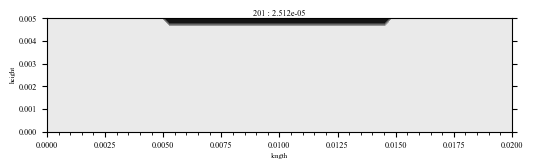

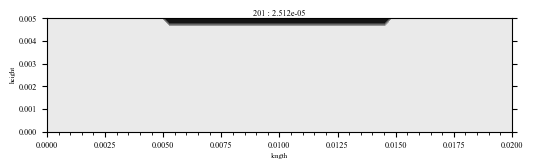

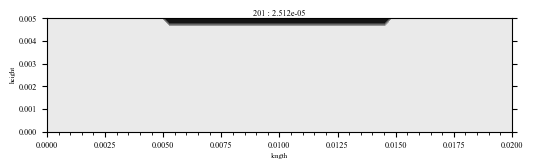

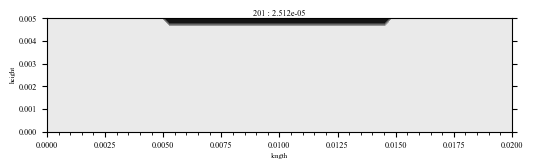

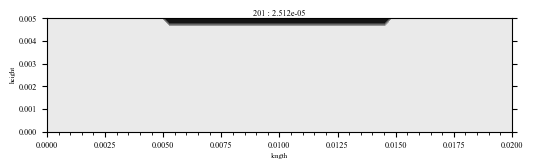

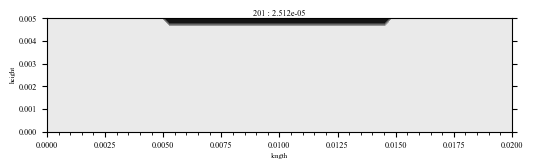

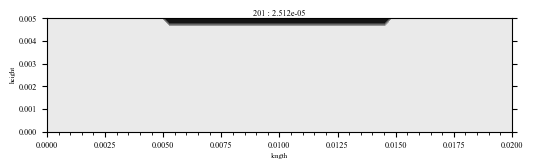

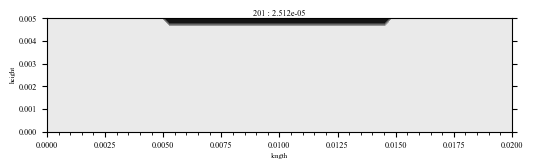

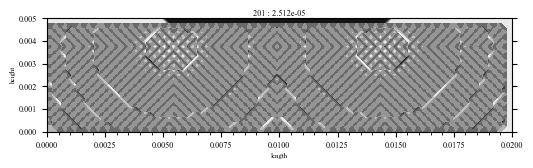

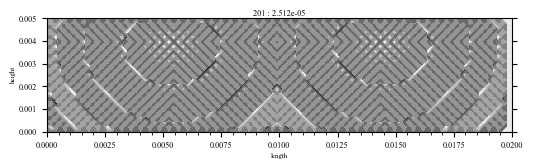

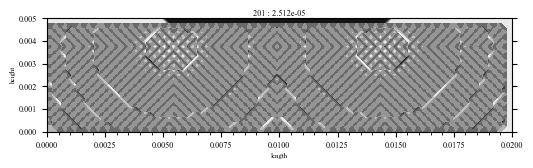

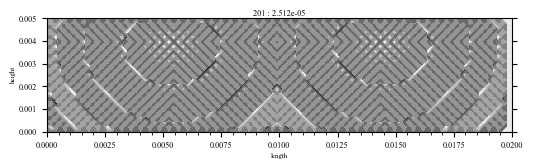

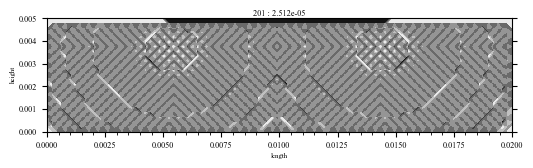

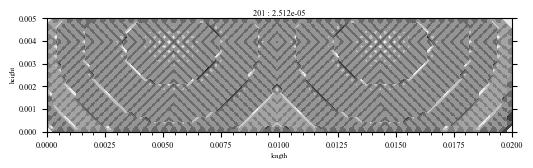

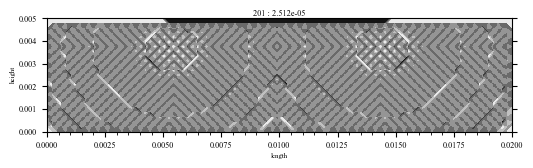

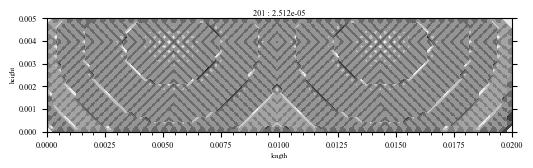

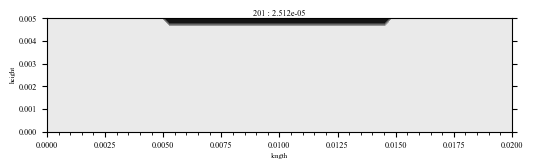

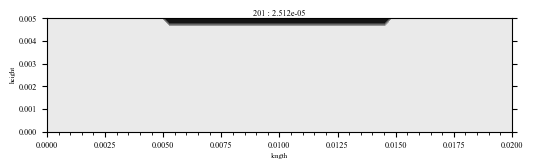

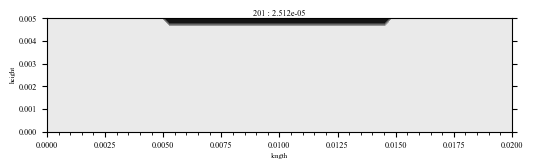

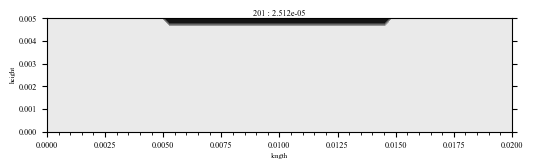

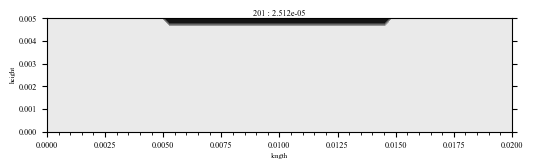

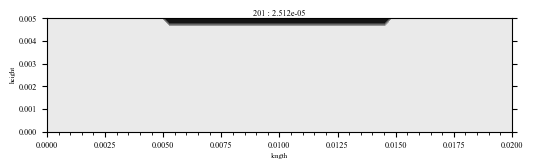

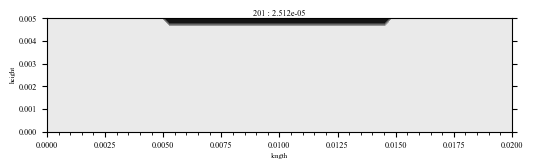

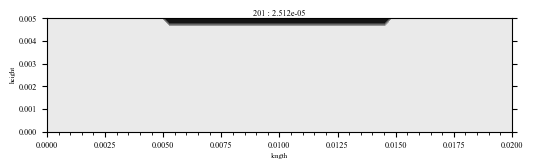

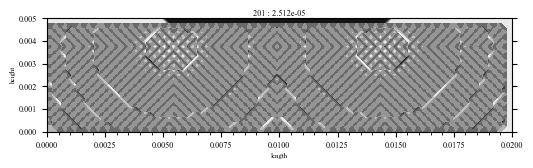

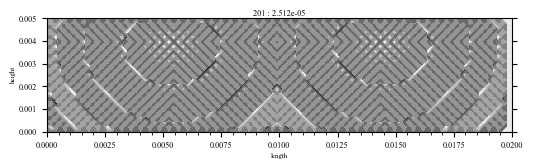

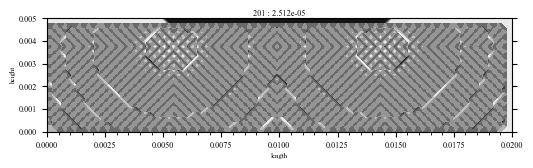

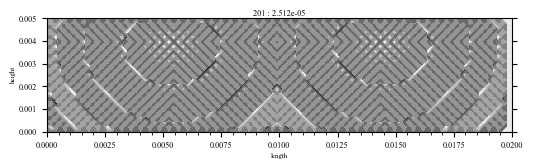

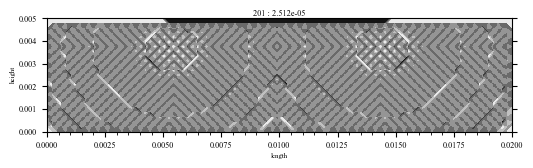

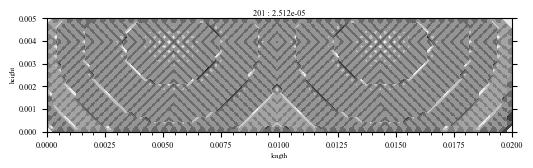

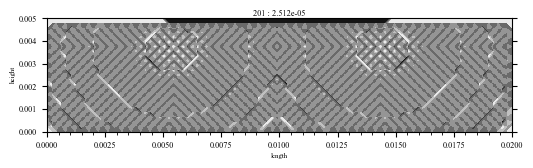

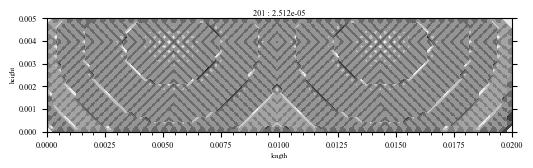

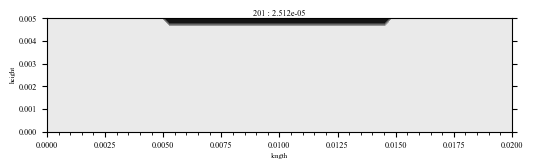

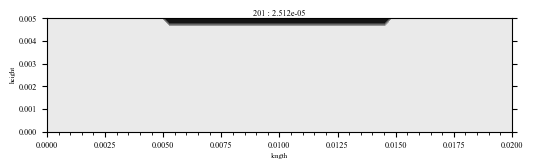

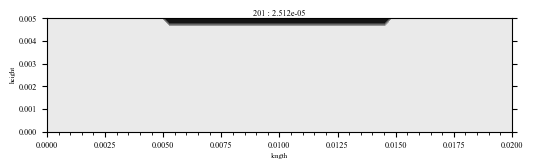

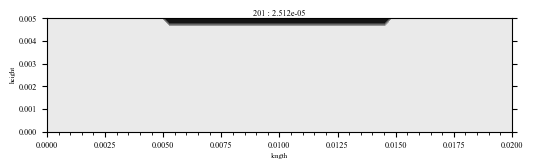

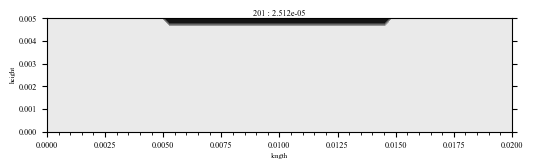

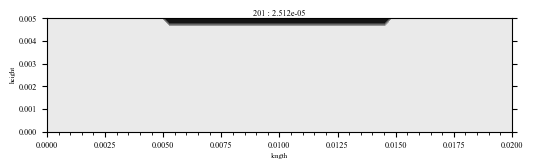

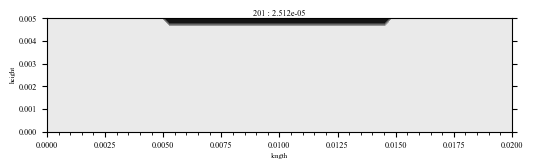

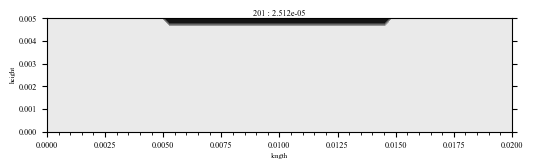

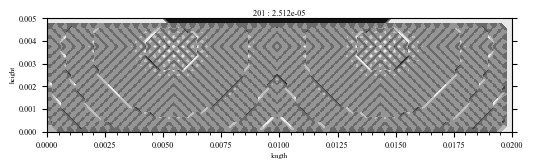

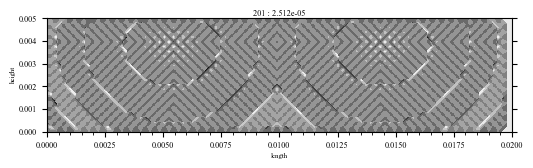

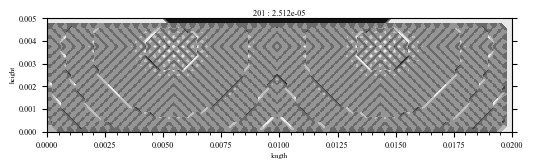

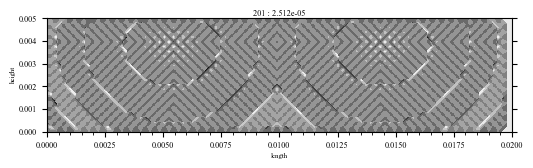

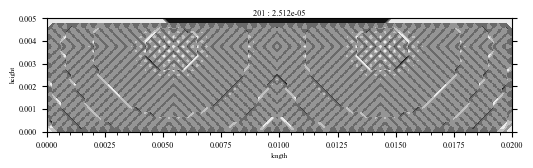

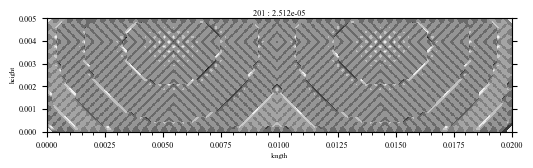

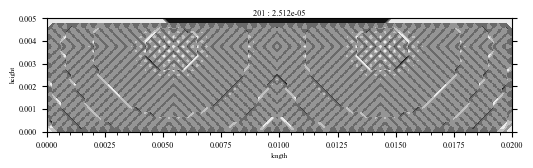

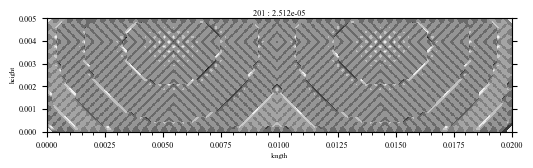

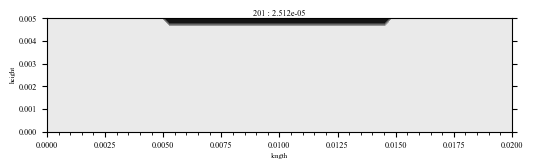

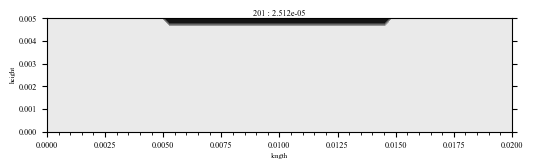

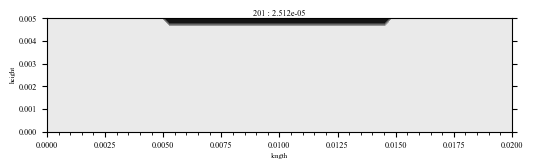

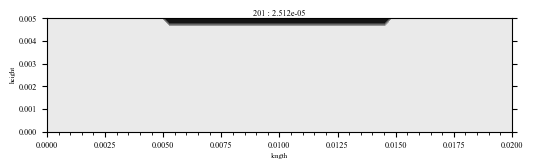

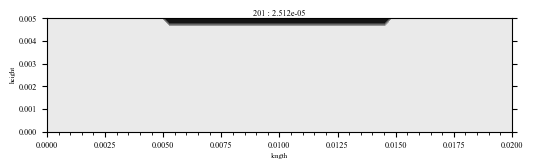

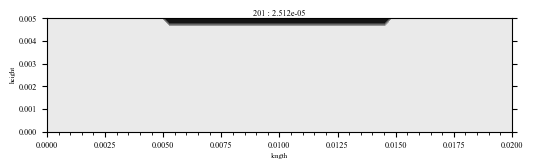

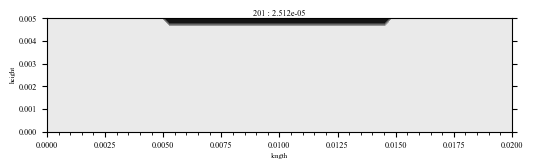

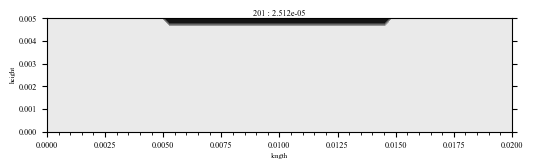

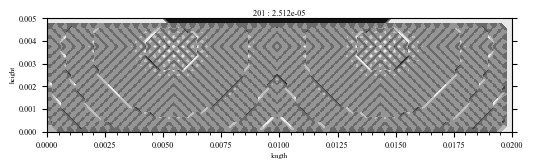

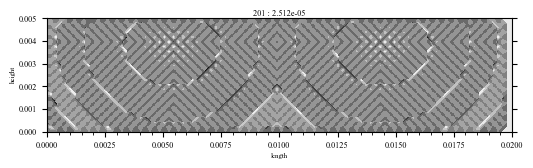

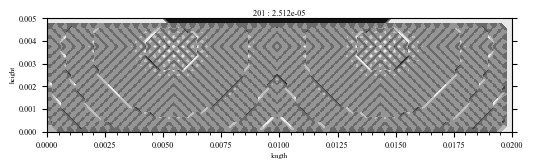

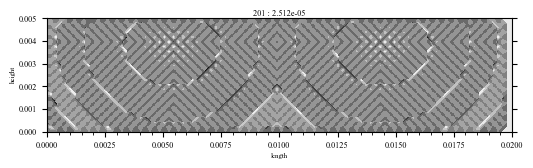

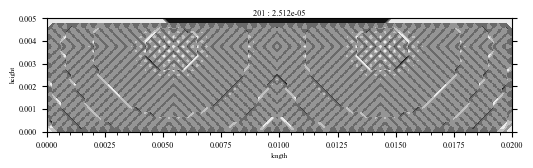

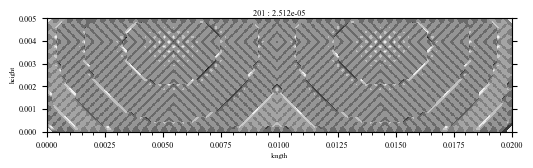

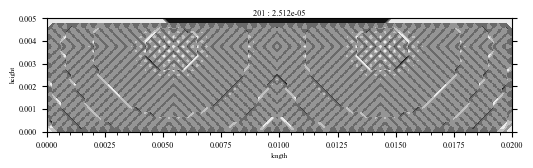

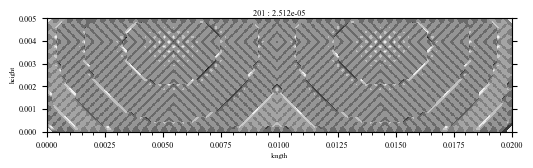

In [7]:
#Run main function for time:
for looooooping in range(64):
    
    lba=[]
    for i in range(6):
        lba.append(int('{0:08b}'.format(looooooping)[0:3+i][-1]))

    [sx,sy,sz,vx,vy,vz] = lba #[1,1,1,1,1,1]

    Rail.Gv[:,:,:,:]=0
    Rail.Gs[:,:,:,:,:]=0

    # CenterXResults = []
    # CenterYResults = []
    CenterZResults = []
    # AllVelocities=[]
    # VelocitiesX=[]
    # VelocitiesY=[]
    # VelocitiesZ=[]


    t=0
    CenterZResults.append((np.matrix(Rail.VelocityCut(1,2)),t))


    for i in range(Tsteps - 1):
        t = (i+1) * ts
    
        #Update Stresses at next half step:
        Rail.StepStresses(sx,sy,sz)

        #update Velocity:
        Rail.StepVelocities(vx,vy,vz)
        
        if i >= StartStep and i <= EndStep: 
            Rail.ForcingFunctionImpulse(Power,EmitterSize,Dimmension,Direction, CornerCut)
        #    Rail.ForcingFunctionWave(t, frequency/2, 1,0.01,2,1)
        #else:
        #    Rail.ForcingFunctionWave(t, frequency, 0)
        
        
        #print(str(i+1) + ' of ' + str(Tsteps-1) +' time steps. time is: '+ "{:.3e}".format(t)) #str(t))

        #  Save off each time step the currrent state for anmication later
        CenterZResults.append((np.matrix(Rail.VelocityCut(1,2)),t))
        # AllVelocities.append( Rail.VelocitySave())
        # VelocitiesX.append(Rail.VelocitySave(0))
        # VelocitiesY.append(Rail.VelocitySave(1))
        # VelocitiesZ.append(Rail.VelocitySave(2))
        
        # Store results mid process for latter animating
        if i % 10 == 9:
            print(str(i+1) + ' of ' + str(Tsteps-1) +' time steps. time is: '+ "{:.3e}".format(t)+' on loop '+str(looooooping)) #str(t))
        
        # Other data save out options at different time steps

    makeAnimation(CenterZResults, 'tries '+str(sx)+str(sy)+str(sz)+str(vx)+str(vy)+str(vz))



In [8]:

    """
        np.savetxt(str(i)+'V0.csv', Rail.VelocityCut(0), delimiter=",")
        np.savetxt(str(i)+'V1.csv', Rail.VelocityCut(1), delimiter=",")
        np.savetxt(str(i)+'V2.csv', Rail.VelocityCut(1), delimiter=",")
        np.savetxt(str(i)+'S0.csv', Rail.StressCut(0,1,1), delimiter=",")
        np.savetxt(str(i)+'S1.csv', Rail.StressCut(1,1,1), delimiter=",")
        np.savetxt(str(i)+'S2.csv', Rail.StressCut(2,1,1), delimiter=",")

    TempZ=Rail.StressCut(2,1,1)
    np.savetxt(str(i)+'S11.csv', TempZ, delimiter=",")
    TempZ=Rail.StressCut(2,1,0)
        np.savetxt(str(i)+'S10.csv', TempZ, delimiter=",")
        TempZ=Rail.StressCut(2,1,2)
        np.savetxt(str(i)+'S12.csv', TempZ, delimiter=",")
        TempZ=Rail.StressCut(2,0,0)
        np.savetxt(str(i)+'S00.csv', TempZ, delimiter=",")
        TempZ=Rail.StressCut(2,0,2)
        np.savetxt(str(i)+'S02.csv', TempZ, delimiter=",")
        TempZ=Rail.StressCut(2,2,2)
        np.savetxt(str(i)+'S22.csv', TempZ, delimiter=",")
    
    """
    
    #x,y,z, Rail.MaxX, Rail.MaxY, Rail.MaxZ
#np.sqrt(Rail.Gv[2,1,:,:]**2+Rail.Gv[0,1,:,:]**2+Rail.Gv[1,1,:,:]**2)

'\n    np.savetxt(str(i)+\'V0.csv\', Rail.VelocityCut(0), delimiter=",")\n    np.savetxt(str(i)+\'V1.csv\', Rail.VelocityCut(1), delimiter=",")\n    np.savetxt(str(i)+\'V2.csv\', Rail.VelocityCut(1), delimiter=",")\n    np.savetxt(str(i)+\'S0.csv\', Rail.StressCut(0,1,1), delimiter=",")\n    np.savetxt(str(i)+\'S1.csv\', Rail.StressCut(1,1,1), delimiter=",")\n    np.savetxt(str(i)+\'S2.csv\', Rail.StressCut(2,1,1), delimiter=",")\n\nTempZ=Rail.StressCut(2,1,1)\nnp.savetxt(str(i)+\'S11.csv\', TempZ, delimiter=",")\nTempZ=Rail.StressCut(2,1,0)\n    np.savetxt(str(i)+\'S10.csv\', TempZ, delimiter=",")\n    TempZ=Rail.StressCut(2,1,2)\n    np.savetxt(str(i)+\'S12.csv\', TempZ, delimiter=",")\n    TempZ=Rail.StressCut(2,0,0)\n    np.savetxt(str(i)+\'S00.csv\', TempZ, delimiter=",")\n    TempZ=Rail.StressCut(2,0,2)\n    np.savetxt(str(i)+\'S02.csv\', TempZ, delimiter=",")\n    TempZ=Rail.StressCut(2,2,2)\n    np.savetxt(str(i)+\'S22.csv\', TempZ, delimiter=",")\n\n'

In [9]:
def ThreeDimmAnimate(FourDVector):
    # create volumes, loading them into opengl memory, and insert into container.
    f = vv.clf()
    a = vv.gca()
    m = vv.MotionDataContainer(a)

    for vol in FourDVector:
        t = vv.volshow(vol)
        t.parent = m
        t.colormap = vv.CM_HOT
        # Remove comments to use iso-surface rendering
        #t.renderStyle = 'iso'
        #t.isoThreshold = 0.2

    # set some settings
    a.daspect = 1,1,-1
    a.xLabel = 'x'
    a.yLabel = 'y'
    a.zLabel = 'z'

    # Enter main loop
    app = vv.use()
    app.Run()

In [10]:
#ThreeDimmAnimate(AllVelocities)

In [11]:
#ThreeDimmAnimate(VelocitiesX)

In [12]:
#ThreeDimmAnimate(VelocitiesY)

In [13]:
#ThreeDimmAnimate(VelocitiesZ)